# Notebook : Figures for paper "Characterization of internal tide non-stationarity : Eulerian versus Lagrangian perspectives"

Figures found in the paper (plus supplements)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob
import os
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec



In [2]:
path = '/Users/zcaspar/codes/Diagnostics2/'
dsv1 = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_param_fit_T80.nc'))] #local
dsv2 = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_param_fit_T80_v2_b*'))] #local
dsv2_omega = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_param_fit_T80_v2_omega.nc'))] #local
#dsv2_omega = [xr.open_dataset(file) for file in [path+'ZC_bootstrapE_v100_omega.nc',path+'ZC_bootstrapL_v100_omega.nc']] #local
#dsv2 = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_param_fit_T80_v2.nc'))] #local

In [3]:
#Model fitted
def myfit(tau,Tt,Xt_ns,Xt_s,Tb,Xb,Omega):
    return np.cos(omega*tau)*(Xt_s+Xt_ns*np.exp(-tau/Tt))+Xb*np.cos(2*np.pi*Omega*tau)*np.exp(-tau/Tb)
def myfit_omega(tau,Tt,Vt_ns,Vt_s,Tb,Vb):
    return np.cos(omega*tau)*(Vt_s+Vt_ns*np.exp(-tau/Tt))+Vb*np.exp(-tau/Tb)

In [4]:
def phi_mu(tau,Tbar):
    return 1-np.exp(-tau/Tbar)
def phi_sigma(tau,Tbar):
    return 1-2*(1-np.exp(-tau/Tbar))*Tbar/tau+(1-np.exp(-2*tau/Tbar))*Tbar/(2*tau)

In [5]:
def r_E(tau,T):
    return tau/T
def T2(tau,Tb,Lt,U):
    return Tb**2*(2*np.pi/Lt)**2*(U*3600*24)**2*(tau/Tb-phi_mu(tau,Tb))
def Cth(tau,T,Tb,Lt,U,Xt_ns,Xt_s):
    return (Xt_s+Xt_ns*np.exp(-r_E(tau,T)))*np.exp(-T2(tau,Tb,Lt,U))

def Ctilde(tau,T,Tb,Lt,U,Xt_ns,Xt_s):
    return (Xt_s+Xt_ns*np.exp(-t1(tau,T)))*np.exp(-t2(tau,Tb,Lt,U)-t3(tau,Tb,Lt,U))
def C_fit(tau,Tt,Xt_ns,Xt_s):
    return Xt_s+Xt_ns*np.exp(-tau/Tt)

In [6]:
tau = np.arange(0,40,10/(24*60))
omega = 2*np.pi*2
Tau = xr.DataArray(tau,dims='tau',coords={'tau':tau})

In [7]:
ce = 'lightseagreen'
cl = 'firebrick'

In [8]:
# Autocorrelatoin from data
corrE = xr.open_dataset(path+'wp7/'+'ZC_Eulerian_corr_80avg1d.nc').rename({'lags':'lag'})
corrL = xr.open_dataset(path+'wp7/'+'ZC_drifters_corr_80avg1d.nc')

In [9]:
for v in ['uu','vv']:
    corrE[v+'_normalized'] = corrE[v]/corrE[v].sel(lag=0)
    corrL[v+'_normalized'] = corrL[v]/corrL[v].sel(lag=0)
for v in ['uv','vu']:#
    corrE[v+'_normalized'] = corrE[v]/np.sqrt(corrE['uu'].sel(lag=0)*corrE['vv'].sel(lag=0))
    corrL[v+'_normalized'] = corrL[v]/np.sqrt(corrL['uu'].sel(lag=0)*corrL['vv'].sel(lag=0))


In [10]:
#Autocovariance and autocorrelation from fit
fit_E,fit_L = {}, {}
fit_E['vv'] = myfit(Tau,dsv2[-2]['E_v_avg'].sel(param='Tt'),dsv2[-2]['E_v_avg'].sel(param='Xt_ns'),
                    dsv2[-2]['E_v_avg'].sel(param='Xt_s'),dsv2[-2]['E_v_avg'].sel(param='Tb'),
                    dsv2[-2]['E_v_avg'].sel(param='Xb'),dsv2[-2]['E_v_avg'].sel(param='Omega')
                   )

fit_E['uu'] = myfit(Tau,dsv2[-2]['E_u_avg'].sel(param='Tt'),dsv2[-2]['E_u_avg'].sel(param='Xt_ns'),
                    dsv2[-2]['E_u_avg'].sel(param='Xt_s'),dsv2[-2]['E_u_avg'].sel(param='Tb'),
                    dsv2[-2]['E_u_avg'].sel(param='Xb'),dsv2[-2]['E_u_avg'].sel(param='Omega')
                   )

fit_L['vv'] = myfit(Tau,dsv2[-2]['L_v_avg'].sel(param='Tt'),dsv2[-2]['L_v_avg'].sel(param='Xt_ns'),
                    dsv2[-2]['L_v_avg'].sel(param='Xt_s'),dsv2[-2]['L_v_avg'].sel(param='Tb'),
                    dsv2[-2]['L_v_avg'].sel(param='Xb'),dsv2[-2]['L_v_avg'].sel(param='Omega')
                   )

fit_L['uu'] = myfit(Tau,dsv2[-2]['L_u_avg'].sel(param='Tt'),dsv2[-2]['L_u_avg'].sel(param='Xt_ns'),
                    dsv2[-2]['L_u_avg'].sel(param='Xt_s'),dsv2[-2]['L_u_avg'].sel(param='Tb'),
                    dsv2[-2]['L_u_avg'].sel(param='Xb'),dsv2[-2]['L_u_avg'].sel(param='Omega')
                   )


In [11]:
#Autocovariance and autocorrelation from fit without omega:
fit_E_omega,fit_L_omega = {}, {}
fit_E_omega['vv'] = myfit_omega(Tau,dsv2_omega[-2]['E_v_avg'].sel(param='Tt'),dsv2_omega[-2]['E_v_avg'].sel(param='Vt_ns'),
                    dsv2_omega[-2]['E_v_avg'].sel(param='Vt_s'),dsv2_omega[-2]['E_v_avg'].sel(param='Tb'),
                    dsv2_omega[-2]['E_v_avg'].sel(param='Vb')
                   )

fit_E_omega['uu'] = myfit_omega(Tau,dsv2_omega[-2]['E_u_avg'].sel(param='Tt'),dsv2_omega[-2]['E_u_avg'].sel(param='Vt_ns'),
                    dsv2_omega[-2]['E_u_avg'].sel(param='Vt_s'),dsv2_omega[-2]['E_u_avg'].sel(param='Tb'),
                    dsv2_omega[-2]['E_u_avg'].sel(param='Vb')
                   )

fit_L_omega['vv'] = myfit_omega(Tau,dsv2_omega[-2]['L_v_avg'].sel(param='Tt'),dsv2_omega[-2]['L_v_avg'].sel(param='Vt_ns'),
                    dsv2_omega[-2]['L_v_avg'].sel(param='Vt_s'),dsv2_omega[-2]['L_v_avg'].sel(param='Tb'),
                    dsv2_omega[-2]['L_v_avg'].sel(param='Vb')
                   )

fit_L_omega['uu'] = myfit_omega(Tau,dsv2_omega[-2]['L_u_avg'].sel(param='Tt'),dsv2_omega[-2]['L_u_avg'].sel(param='Vt_ns'),
                    dsv2_omega[-2]['L_u_avg'].sel(param='Vt_s'),dsv2_omega[-2]['L_u_avg'].sel(param='Tb'),
                    dsv2_omega[-2]['L_u_avg'].sel(param='Vb')
                   )



In [12]:
for v in ['uu','vv']:
    fit_E[v+'_normalized'] = fit_E[v]/fit_E[v].sel(tau=0)
    fit_L[v+'_normalized'] = fit_L[v]/fit_L[v].sel(tau=0)
    fit_E_omega[v+'_normalized'] = fit_E_omega[v]/fit_E_omega[v].sel(tau=0)
    fit_L_omega[v+'_normalized'] = fit_L_omega[v]/fit_L_omega[v].sel(tau=0)

In [13]:
bootL = xr.open_dataset(path+'ZC_bootstrapL_v100_omega.nc')
bootE = xr.open_dataset(path+'ZC_bootstrapE_v100_omega.nc')
bootE = bootE.assign_coords({'y':bootE.y*1e-3})

In [14]:
Te_v2_omega = [xr.merge([d.E_u_avg.sel(param='Tt'),d.E_v_avg.sel(param='Tt')]) for d in dsv2_omega]
Tl_v2_omega = [xr.merge([d.L_u_avg.sel(param='Tt'),d.L_v_avg.sel(param='Tt')]) for d in dsv2_omega]
Tbe_v2_omega = [xr.merge([d.E_u_avg.sel(param='Tb'),d.E_v_avg.sel(param='Tb')]) for d in dsv2_omega]
Tbl_v2_omega = [xr.merge([d.L_u_avg.sel(param='Tb'),d.L_v_avg.sel(param='Tb')]) for d in dsv2_omega]
Xbl_v2_omega = [xr.merge([d.L_u_avg.sel(param='Vb'),d.L_v_avg.sel(param='Vb')]) for d in dsv2_omega]
Xbe_v2_omega = [xr.merge([d.E_u_avg.sel(param='Vb'),d.E_v_avg.sel(param='Vb')]) for d in dsv2_omega]

In [15]:
vmodes = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_waves_modes*'))] #local
Lt = [vm.lwave.sel(mode=1)*1e3 for vm in vmodes]
Ltilde = [L.assign_coords({'y_bins' : L.y_rho*1e-3}) for L in Lt]
Lt_mean_omega = [L.groupby_bins('y_bins',Xbe_v2_omega[i]['E_v_avg'].ybin+25,include_lowest=False).mean() for i,L in enumerate(Ltilde)]
Ltilde_mean_omega = [Ltm.assign_coords({'y_bins_bins':[yy.mid for yy in Ltm.y_bins_bins.values]}).rename({'y_bins_bins':'ybin'}) for Ltm in Lt_mean_omega]





In [16]:
V = '_v_avg'
C_fits_L_omega = [C_fit(Tau,Tl_v2_omega[i]['L'+V],dsv2_omega[i]['L'+V].sel(param='Vt_ns'),dsv2_omega[i]['L'+V].sel(param='Vt_s')) for i in range(len(dsv2_omega))]
C_fits_E_omega = [C_fit(Tau,Te_v2_omega[i]['E'+V],dsv2_omega[i]['E'+V].sel(param='Vt_ns'),dsv2_omega[i]['E'+V].sel(param='Vt_s')) for i in range(len(dsv2_omega))]
#C_th_E = [Ctilde(Tau,Te_v2[i]['E'+V],Tbl_v2[i]['L'+V],Ltilde_mean[i],np.sqrt(2*Xbl_v2[i]['L'+V]),dsv2[i]['E'+V].sel(param='Xt_ns'),dsv2[i]['E'+V].sel(param='Xt_s')) for i in range(len(dsv2))]
#C_th_L = [Ctilde(Tau,Te_v2[i]['E'+V],Tbl_v2[i]['L'+V],Ltilde_mean[i],np.sqrt(2*Xbl_v2[i]['L'+V]),dsv2[i]['L'+V].sel(param='Xt_ns'),dsv2[i]['L'+V].sel(param='Xt_s')) for i in range(len(dsv2))]

CthL_omega = [Cth(Tau,Te_v2_omega[i]['E'+V],Tbl_v2_omega[i]['L'+V],Ltilde_mean_omega[i],np.sqrt(2*Xbl_v2_omega[i]['L'+V]),dsv2_omega[i]['E'+V].sel(param='Vt_ns'),dsv2_omega[i]['E'+V].sel(param='Vt_s')) for i in range(len(dsv2_omega))]


for i in range(len(dsv2)):
    if i!=2:
        C_fits_L_omega[i] = C_fits_L_omega[i].drop('time_instant') 
        C_fits_E_omega[i] = C_fits_E_omega[i].drop('time_instant') 
       # C_th_E[i] = C_th_E[i].drop('time_instant') 
       # C_th_L[i] = C_th_L[i].drop('time_instant') 
        CthL_omega[i] = CthL_omega[i].drop('time_instant') 
    if i==3:
       # C_th_E[i] = C_th_E[i]/2
        C_fits_E_omega[i] = C_fits_E_omega[i]/2
       # C_th_L[i] = C_th_L[i]/2
        CthL_omega[i] = CthL_omega[i]/2

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

In [17]:
C_fit_L_omega = xr.concat(C_fits_L_omega,dim='wp')
C_fit_E_omega = xr.concat(C_fits_E_omega,dim='wp')
#C_th_E = xr.concat(C_th_E,dim='wp')
#C_th_L = xr.concat(C_th_L,dim='wp')
CthL_omega = xr.concat(CthL_omega,dim='wp')
#C_comp = xr.Dataset(data_vars = {'fit_L':C_fit_L,'fit_E':C_fit_E,'th_E':C_th_E,'th_L':C_th_L,'th':CthL},coords={'tau':C_fit_E.tau.values,'wp':np.arange(0,5),'ybin':C_fit_E.ybin.values})

C_comp_omega = xr.Dataset(data_vars = {'fit_L':C_fit_L_omega,'fit_E':C_fit_E_omega,'th':CthL_omega},coords={'tau':C_fit_E_omega.tau.values,'wp':np.arange(0,5),'ybin':C_fit_E_omega.ybin.values})

In [18]:
V = '_v_avg'
terms_E = [r_E(Tl_v2_omega[i]['L'+V],Te_v2_omega[i]['E'+V]) for i in range(len(dsv2_omega))]
terms_adv = [T2(Tl_v2_omega[i]['L'+V],Tbl_v2_omega[i]['L'+V],
                Ltilde_mean_omega[i],np.sqrt(Xbl_v2_omega[i]['L'+V])
               ) for i in range(len(dsv2_omega))]
terms_adv_E = [T2(Te_v2_omega[i]['E'+V],Tbl_v2_omega[i]['L'+V],
                  Ltilde_mean_omega[i],np.sqrt(Xbl_v2_omega[i]['L'+V])
                 ) for i in range(len(dsv2_omega))]

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

### Figures 1 and 2 : cf synthesis/Summary_wp7.ipynb

### Figure 3 :

In [19]:
corrE = corrE.assign_coords({'y_bins':corrE.y_bins.values*1e-3})

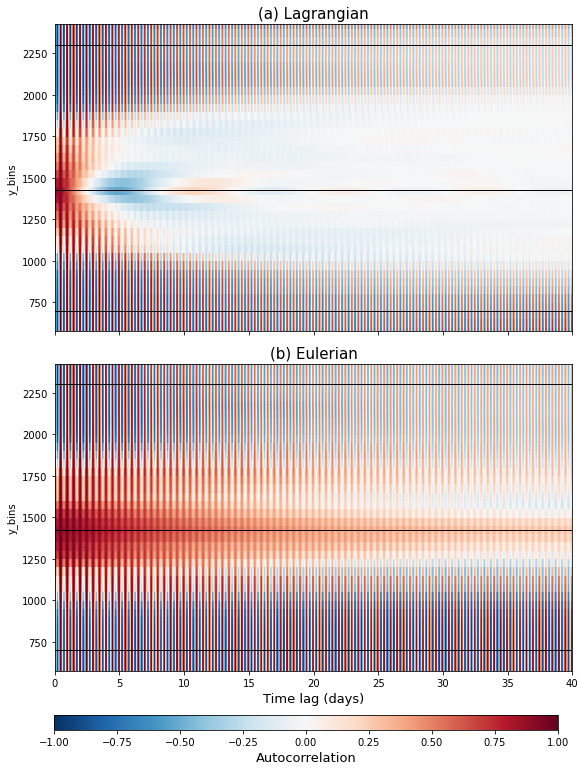

In [20]:
fig,ax = plt.subplots(2,1,figsize=(10,10))
ymax = corrL['uu_normalized'].dropna(dim='y_bins').y_bins.max()
ymin = corrL['uu_normalized'].dropna(dim='y_bins').y_bins.min()
V = 'vv'
#for V,i in zip(['uu','vv'],range(2)):
im = corrL[V+'_normalized'].plot(ax=ax[0],add_colorbar=False)#;ax[0].set_ylabel('')
corrE[V+'_normalized'].plot(ax=ax[1],add_colorbar=False)#;ax[1].set_ylabel('')
#[ax[0].axvline(x,linestyle='dotted',color='k',linewidth=1) for x in np.arange(0,40,4*0.5)]
#ax[i,0].set_title(r'$\;$',fontsize=15);ax[i,0].set_ylabel('y(km)',fontsize=13);
#ax[i,0].set_xlabel('',fontsize=13)
#[ax[1].axvline(x,linestyle='dotted',color='k',linewidth=1) for x in np.arange(0,40,2*0.5)]
#ax[i,1].set_title('',fontsize=15);ax[i,1].set_yticklabels('')#;ax[i,1].set_ylabel('y(m)',fontsize=15)
#ax[i,1].set_xlabel('',fontsize=13)
ax[0].set_ylim(ymin,ymax);ax[1].set_ylim(ymin,ymax)
for y in [700,1425,2300]:
    ax[0].axhline(y,c='k',linewidth=1)
    ax[1].axhline(y,c='k',linewidth=1)
ax[0].set_xlabel('')
ax[1].set_xlabel('Time lag (days)',fontsize=13)
ax[0].set_title('(a) Lagrangian',fontsize=15);ax[1].set_title('(b) Eulerian',fontsize=15);
ax[0].set_xticklabels('')

fig.tight_layout()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.08, -0.02, 0.7, 0.02])
cb = fig.colorbar(im, cax=cbar_ax,orientation = 'horizontal')#
cb.set_label('Autocorrelation',size=13)
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure3_review.png',bbox_inches='tight')




## Figure 4 : 

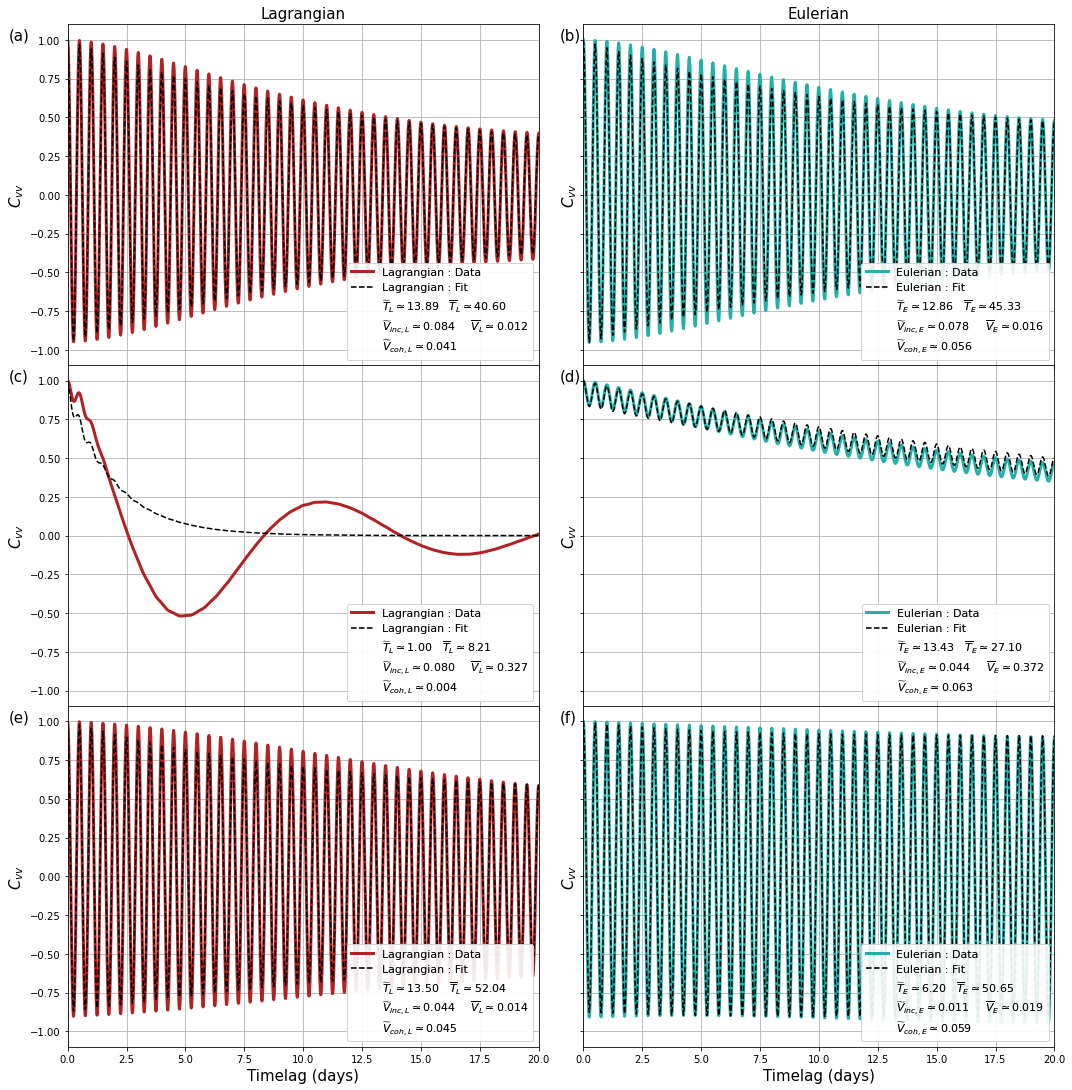

In [21]:
import matplotlib as mpl
from matplotlib.patches import Rectangle

ce_fit = 'k'
cl_fit='k'
#Sections
Y=[2300,1425,700]

props = dict(boxstyle='round', facecolor='w', alpha=0.5)

# place a text box in upper left in axes coords


fig,axs = plt.subplots(3,2,figsize=(15,15),sharex=True, sharey=True,gridspec_kw={'hspace': 0})
V = 'vv'
for i,y in enumerate(Y):
    #for V,ax in zip(['uu','vv'],axs[i,:]):
    #for V in zip(['uu','vv'],axs[i,:]):
    paE = dsv2[-2]['E_'+V[0]+'_avg'].sel(ybin=y,method='nearest').values
    paL = dsv2[-2]['L_'+V[0]+'_avg'].sel(ybin=y,method='nearest').values
    textstrE = '\n'.join((
            r'$\widetilde{T}_E\simeq%.2f\hspace{1}\overline{T}_E\simeq%.2f$' % (paE[0], paE[3]),
            r'$\widetilde{V}_{inc,E}\simeq%.3f\hspace{1.5}\overline{V}_E\simeq%.3f$' % (np.sqrt(paE[1]/2),np.sqrt(paE[4])),
            #r'$\widetilde{V}_{s,E}\simeq%.3f\hspace{1.5}\Omega_E\simeq%.2f$'% (np.sqrt(paE[2]/2),paE[5])
            r'$\widetilde{V}_{coh,E}\simeq%.3f$'% (np.sqrt(paE[2]/2))
                            ))
    textstrL = '\n'.join((
            r'$\widetilde{T}_L\simeq%.2f\hspace{1}\overline{T}_L\simeq%.2f$' % (paL[0], paL[3]),
            r'$\widetilde{V}_{inc,L}\simeq%.3f\hspace{1.5}\overline{V}_L\simeq%.3f$' % (np.sqrt(paL[1]),np.sqrt(paL[4])),
#            r'$\widetilde{V}_{s,L}\simeq%.3f\hspace{1.5}\Omega_L\simeq%.2f$'% (np.sqrt(paL[2]),paL[5])
            r'$\widetilde{V}_{coh,L}\simeq%.3f$'% (np.sqrt(paL[2]))
                            ))
    corrE[V+'_normalized'].sel(y_bins=y,method='nearest').plot(c=ce,linewidth = 3,ax=axs[i,1],label=('Eulerian : Data'))
    fit_E_omega[V+'_normalized'].sel(ybin=y,method='nearest').plot(c = ce_fit,linestyle='--',ax=axs[i,1],label=('Eulerian : Fit'))
    corrL[V+'_normalized'].sel(y_bins=y,method='nearest').plot(c=cl,linewidth = 3,ax=axs[i,0],label=('Lagrangian : Data'))
    fit_L_omega[V+'_normalized'].sel(ybin=y,method='nearest').plot(c=cl_fit,linestyle='--',ax=axs[i,0],label=('Lagrangian : Fit'))
    handles,labels = axs[i,0].get_legend_handles_labels()
    extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    legendL = axs[i,0].legend(handles[:]+[extra],labels[:]+[textstrL],loc='lower right',framealpha=0.7,fontsize=11)
    axs[i,0].add_artist(legendL)
    handles,labels = axs[i,1].get_legend_handles_labels()
    extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    legendE = axs[i,1].legend(handles[:]+[extra],labels[:]+[textstrE],loc='lower right',framealpha=0.7,fontsize=11);
    axs[i,1].add_artist(legendE)
    for ax in axs[i,:]:
        ax.set_ylim(-1.1,1.1);ax.grid();ax.set_title('')
        ax.set_ylabel(r'$C_{%s}$'%V,fontsize=15);ax.set_xlabel('Timelag (days)',fontsize=15)
        ax.set_xlim(0,20)
        
fig.tight_layout()
for ax,txt in zip(axs[:,0],['(a)','(c)','(e)']):
    ax.text(-2.5,1,txt,fontsize=15)
for ax,txt in zip(axs[:,1],['(b)','(d)','(f)']):
    ax.text(-1.,1,txt,fontsize=15)
axs[0,0].set_title('Lagrangian',fontsize=15)
axs[0,1].set_title('Eulerian',fontsize=15)
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure4_review.pdf',bbox_inches='tight')

Caption : Normalized autocorrelation at fixed bin in three different area : north (a and b), center (c and d) and south (e and f) of the domain). The eulerian and lagrangian autocorrelation derived from our data are represented respectively in blue and red. The best fits found with our theoretical model are plotted in grey dashed lines.

## Figure 5 : 

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


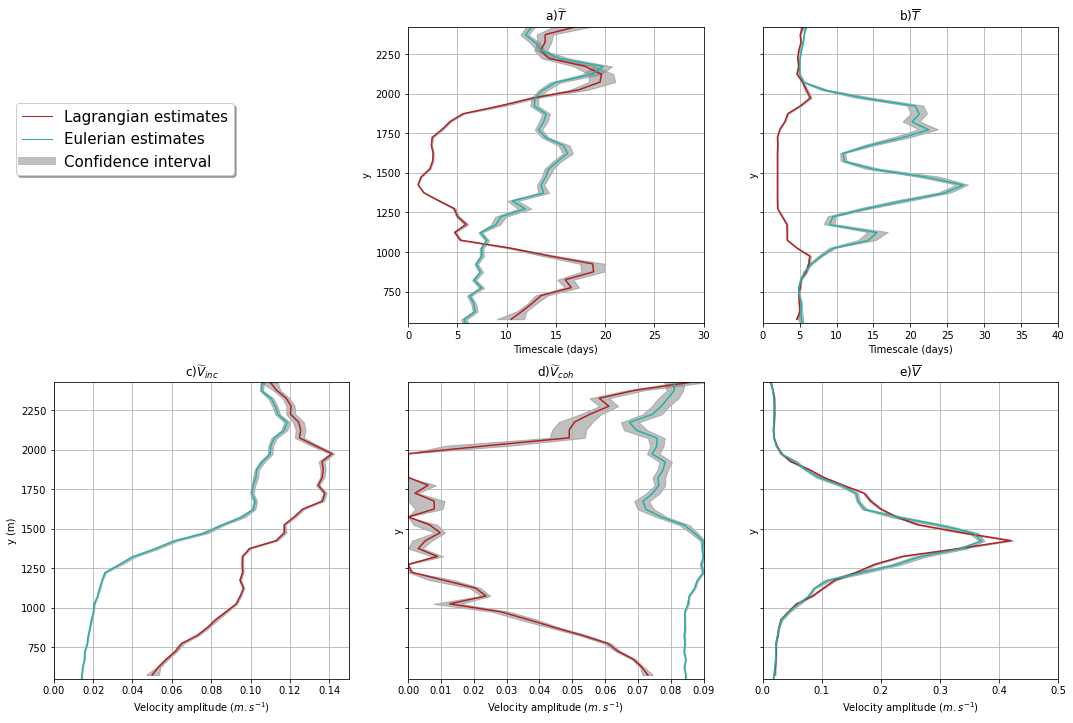

In [23]:
from matplotlib.lines import Line2D

lims = [[0,30],[0,40],[0,0.15],[0,0.09],[0,0.5]]
fig,axs = plt.subplots(2,3,figsize=(18,12))
for V,ax,title,lim in zip(['Tt','Tb'],axs[0,1:],[r'a)$\widetilde{T}$',r'b)$\overline{T}$'],lims[:2]):
    ax.fill_betweenx(bootL.y_cut,bootL[V+'_lower'],bootL[V+'_upper'],color='grey',alpha=0.5)
    bootL[V].plot(ax=ax,c='firebrick',y='y_cut')
    ax.fill_betweenx(bootE.y,bootE[V+'_lower'],bootE[V+'_upper'],color='grey',alpha=0.5)
    bootE[V].plot(ax=ax,c='lightseagreen',y='y')
    ax.grid();ax.set_title(title);ax.set_xlim(lim);ax.set_ylim(550,2425)
    ax.set_xlabel('Timescale (days)')

for V,ax,title,lim in zip(['Xt_ns','Xt_s','Xb'],axs[1,:],[r'c)$\widetilde{V}_{inc}$',r'd)$\widetilde{V}_{coh}$',
                                                 r'e)$\overline{V}$'],lims[2:]):
    ax.fill_betweenx(bootL.y_cut,np.sqrt(bootL[V+'_lower'].where(np.sqrt(bootL[V+'_lower'])>0).fillna(0))
                     ,np.sqrt(bootL[V+'_upper']),color='grey',alpha=0.5)
    np.sqrt(bootL[V]).plot(ax=ax,c='firebrick',y='y_cut')
    ax.fill_betweenx(bootE.y,np.sqrt(bootE[V+'_lower']),np.sqrt(bootE[V+'_upper']),color='grey',alpha=0.5)
    np.sqrt(bootE[V]).plot(ax=ax,c='lightseagreen',y='y')
    ax.grid();ax.set_title(title);ax.set_xlim(lim);ax.set_ylim(550,2425)
    ax.set_xlabel(r'Velocity amplitude ($m.s^{-1}$)')
fig.delaxes(axs[0,0])
labels = ['Lagrangian estimates','Eulerian estimates','Confidence interval ']
custom_lines = [Line2D([0], [0], color='firebrick', lw=1),
                Line2D([0], [0], color='lightseagreen', lw=1),
                Line2D([0], [0], color='grey', lw=8,alpha=0.5
                      )]
plt.setp(axs[1,1].get_yticklabels(),visible=False)
plt.setp(axs[1,2].get_yticklabels(),visible=False)
plt.setp(axs[0,2].get_yticklabels(),visible=False)
axs[0,0].set_ylabel('y (m)')
axs[1,0].set_ylabel('y (m)')
fig.legend(custom_lines, labels, bbox_to_anchor=((0.27,0.8)),fontsize=15,fancybox=True,shadow=True)
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/'+'Figure5_review.pdf',bbox_inches='tight')




## Figure 6

In [30]:
number

5

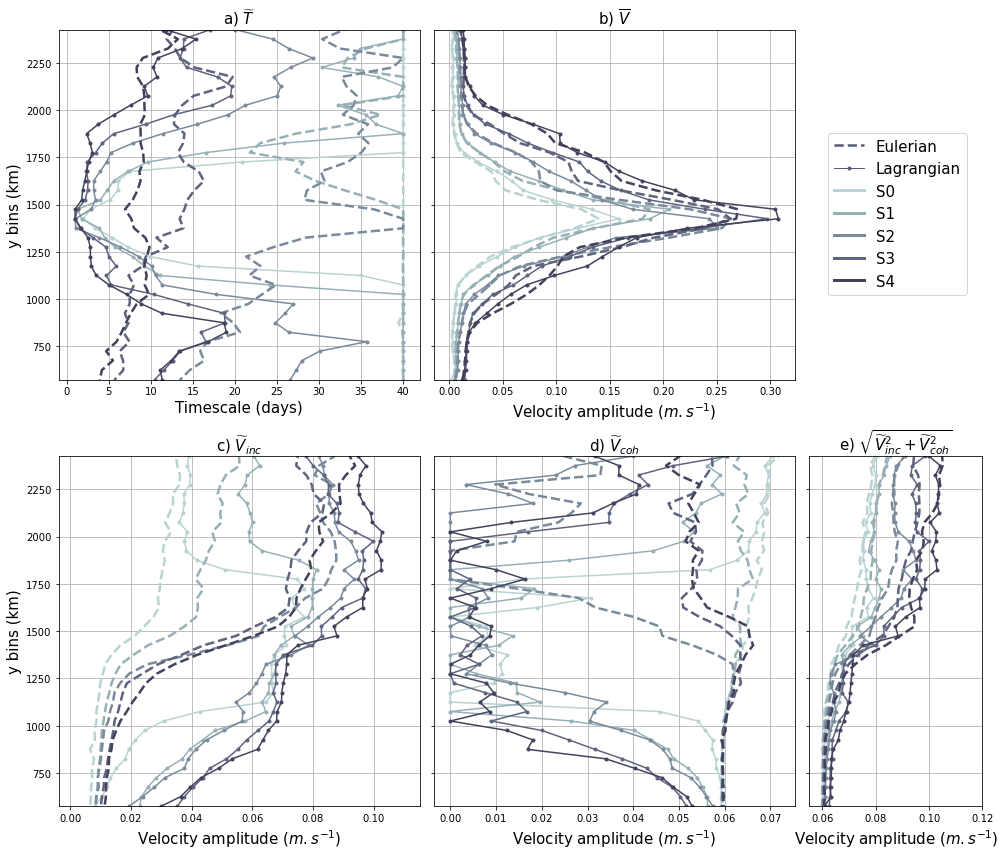

In [36]:
number = len(dsv2)
cmap_Ta = plt.get_cmap('Greys')
cmap = plt.get_cmap('bone_r')
#colors_Ta = [cmap_Ta(i) for i in np.linspace(0.5, 1, number)]
colors = [cmap(i) for i in np.linspace(0.2, .7, number)]


width_E=2.5
alpha_L = 1.
alpha_E = 1.

lims_vv = [(0,40),(0,0.35),(0,0.12),(0,0.12)]
V = '_v_avg'
size=15
fig = plt.figure(figsize=(14,12))
spec = gridspec.GridSpec(ncols=5, nrows=4, figure=fig)


axT = fig.add_subplot(spec[0:2,0:2])
axVb = fig.add_subplot(spec[0:2,2:4],sharey=axT)
axVns = fig.add_subplot(spec[2:4,0:2])
axVs = fig.add_subplot(spec[2:4,2:4],sharey=axVns)
axVt = fig.add_subplot(spec[2:4,4:],sharey=axVns)

#for pa,title,lim,ax in zip(['Tt','Tb'],titles[:2],lims_vv[:2],axes[0,:]):
labels = ['Eulerian','Lagrangian']
#cmap = plt.get_cmap('bone')
custom_lines = [
                Line2D([0], [0], color=cmap(.6), lw=width_E,linestyle ='--'),
                Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
               ]
ymax = np.min([d['L'+V].dropna(dim='ybin').ybin.max() for d in dsv2_omega])
ymin = np.max([d['L'+V].dropna(dim='ybin').ybin.min() for d in dsv2_omega])
titles= [r'a) $\widetilde{T}$',r'b) $\overline{V}$', r'c) $\widetilde{V}_{inc}$',r'd) $\widetilde{V}_{coh}$',
         r'e) $\sqrt{\widetilde{V}_{inc}^2+\widetilde{V}_{coh}^2}$']

for i,d in enumerate(dsv2_omega):
    d['L'+V].sel(param='Tt').plot(y='ybin',c=colors[i],ax=axT,marker='.',alpha=alpha_L)
    d['E'+V].sel(param='Tt').plot(y='ybin',c=colors[i],ax=axT,linestyle='--',linewidth=width_E,alpha=alpha_E)
    custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
    labels.append('S%s'% i)
    for ax,pa in zip([axVb,axVns,axVs],['Vb','Vt_ns','Vt_s']):
        if i!=3:
            (np.sqrt(d['L'+V].sel(param=pa))).plot.line(y='ybin',c=colors[i],ax=ax,marker='.',alpha=alpha_L)
            (np.sqrt(d['E'+V].sel(param=pa))).plot(y='ybin', c=colors[i],ax=ax,linestyle='--',linewidth=width_E,alpha=alpha_E)
    
        else:
            (np.sqrt(d['L'+V].sel(param=pa))).plot(y='ybin',c=colors[i],ax=ax,marker='.',alpha=alpha_L)
            (np.sqrt(d['E'+V].sel(param=pa)/2)).plot(y='ybin', c=colors[i],ax=ax,linestyle='--',linewidth=width_E,alpha=alpha_E)

    if i!=3:
        (np.sqrt(dsv2_omega[i]['E'+V].sel(param='Vt_ns')+dsv2_omega[i]['E'+V].sel(param='Vt_s'))
        ).plot(y='ybin',c=colors[i],ax=axVt,linestyle='--',linewidth=width_E,alpha=alpha_E)
        (np.sqrt(dsv2_omega[i]['L'+V].sel(param='Vt_ns')+dsv2_omega[i]['L'+V].sel(param='Vt_s'))
        ).plot(y='ybin',marker='.',c=colors[i],ax=axVt,alpha=alpha_L)
    else:
        (np.sqrt(dsv2_omega[i]['E'+V].sel(param='Vt_ns')/2+dsv2_omega[i]['E'+V].sel(param='Vt_s')/2)
        ).plot(y='ybin',c=colors[i],ax=axVt,linestyle='--',linewidth=width_E,alpha=alpha_E)
        (np.sqrt(dsv2_omega[i]['L'+V].sel(param='Vt_ns')+dsv2_omega[i]['L'+V].sel(param='Vt_s'))
        ).plot(y='ybin',marker='.',c=colors[i],ax=axVt,alpha=alpha_L)
for ax,title in zip([axT,axVb,axVns,axVs,axVt],titles):   
    ax.grid();ax.set_title(title,fontsize=size);ax.set_ylabel('');
    ax.set_xlabel(r'Velocity amplitude ($m.s^{-1}$)',fontsize=size)
    ax.set_ylim(ymin,ymax)
axT.set_xlabel('Timescale (days)',fontsize=size)
axT.set_ylabel('y bins (km)',fontsize=size)
axVns.set_ylabel('y bins (km)',fontsize=size)
axVt.set_xlim(0.055,0.12)
plt.setp(axVb.get_yticklabels(),visible=False)
plt.setp(axVs.get_yticklabels(),visible=False)
plt.setp(axVt.get_yticklabels(),visible=False)

fig.legend(custom_lines, labels, bbox_to_anchor=((0.97,0.85)),fontsize=size)
fig.tight_layout()
plt.show()
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure6_review.pdf',bbox_inches='tight')

## Figure 7 

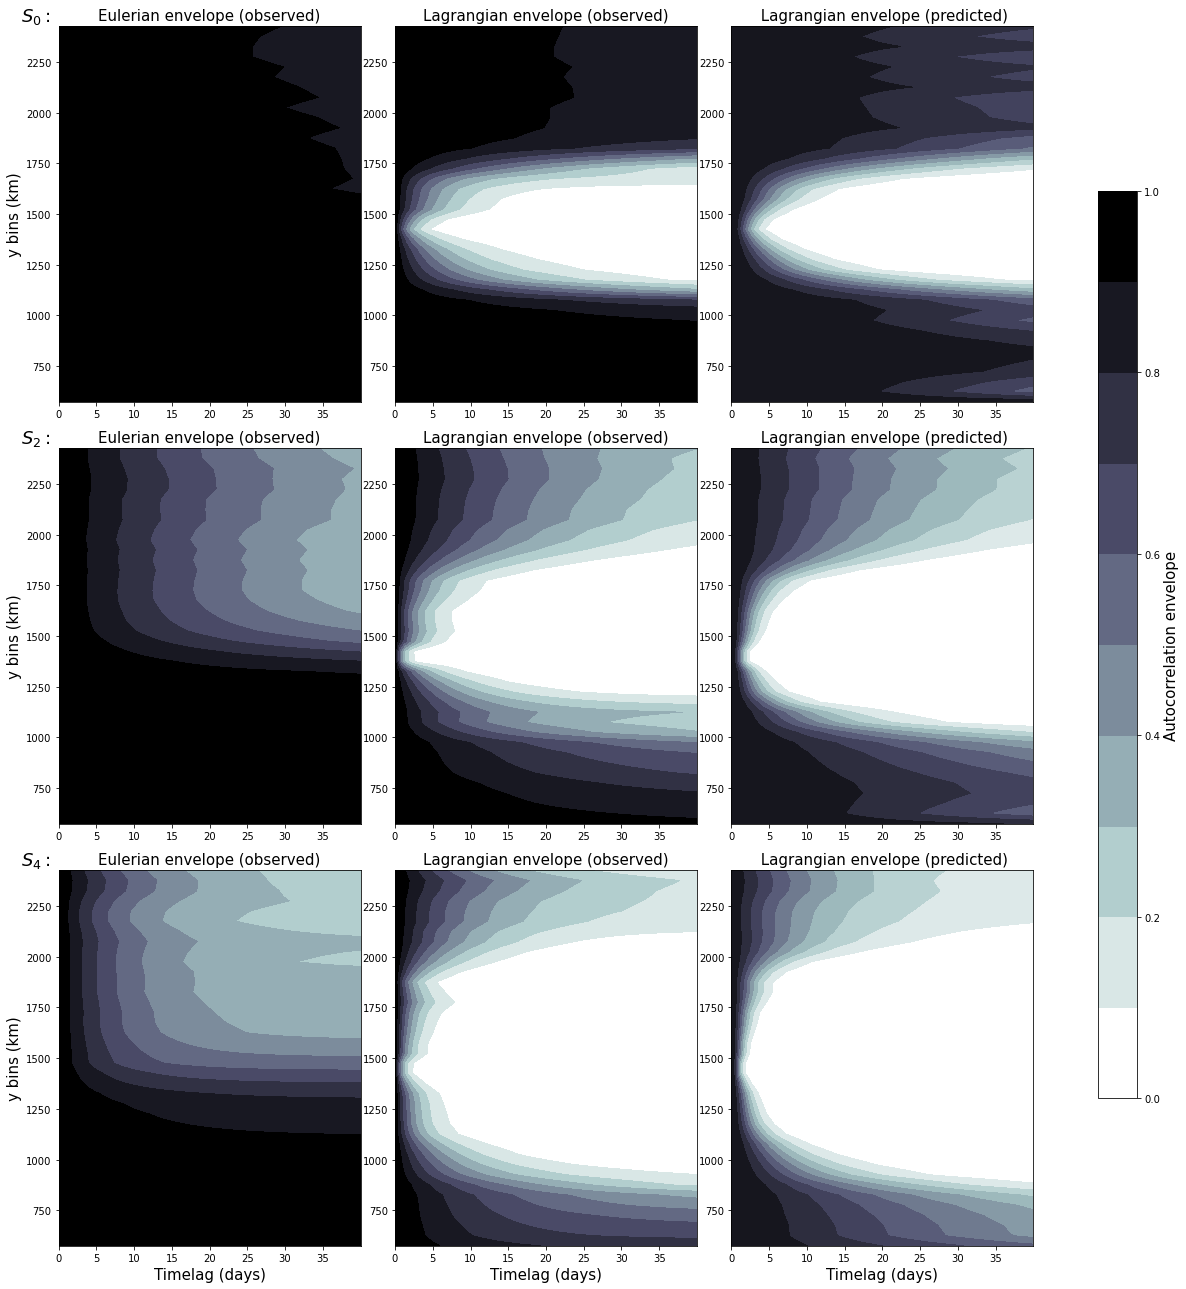

In [39]:
size = 15
cmap = 'bone_r'
lev=11
fig,axs = plt.subplots(3,3,figsize=(18,18))
for i,S in enumerate(C_comp_omega.wp.values[::2]):
    ax = axs[i,:]
    m = 0#np.min([C_comp.fit_E.sel(wp=S).min(),C_comp.fit_L.sel(wp=S).min(),C_comp.th_E.sel(wp=S).min()])
    M = 1#np.max([C_comp.fit_E.sel(wp=S).max(),C_comp.fit_L.sel(wp=S).max(),C_comp.th_E.sel(wp=S).max()])
    im = (C_comp_omega.fit_E.sel(wp=S)/C_comp_omega.fit_E.sel(wp=S).isel(tau=0)).plot.contourf(ax=ax[0],vmin=m,vmax=M,cmap=cmap,levels=lev,add_colorbar=False)
    (C_comp_omega.fit_L.sel(wp=S)/C_comp_omega.fit_L.sel(wp=S).isel(tau=0)).plot.contourf(ax=ax[1],vmin=m,vmax=M,cmap=cmap,levels=lev,add_colorbar=False)
    (C_comp_omega.th.sel(wp=S)/C_comp_omega.th.sel(wp=S).isel(tau=1)).plot.contourf(ax=ax[2],vmin=m,vmax=M,cmap=cmap,levels=lev,add_colorbar=False)
     
    for a,title in zip(ax,['Eulerian envelope (observed)','Lagrangian envelope (observed)',' Lagrangian envelope (predicted)']):
        a.set_xlabel('',fontsize=size);a.set_ylim(C_comp_omega.fit_L.dropna(dim='ybin').ybin.min(),
                                                  C_comp_omega.fit_L.dropna(dim='ybin').ybin.max())
        a.set_title(title,fontsize=size);a.set_ylabel('')
    ax[0].set_ylabel('y bins (km)',fontsize=size)
axs[2,0].set_xlabel('Timelag (days)',fontsize=size);axs[2,1].set_xlabel('Timelag (days)',fontsize=size);
axs[2,2].set_xlabel('Timelag (days)',fontsize=size)
axs[0,0].text(-5,2450,r'$S_0 : $',size=18)
axs[1,0].text(-5,2450,r'$S_2 : $',size=18)
axs[2,0].text(-5,2450,r'$S_4 : $',size=18)
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label('Autocorrelation envelope',size=size)
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure7_review.png',bbox_inches='tight')

## Figure 8

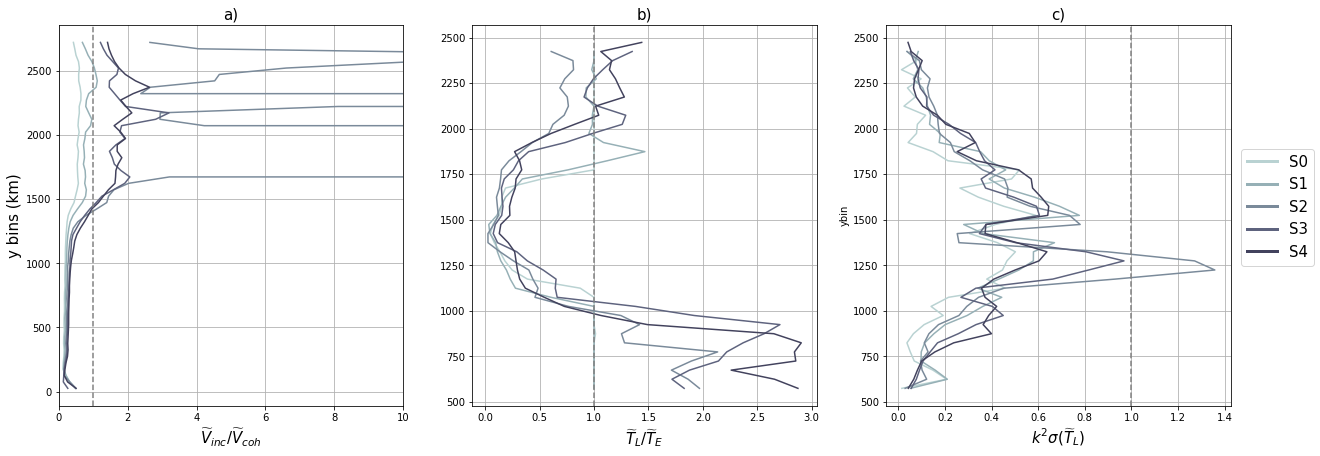

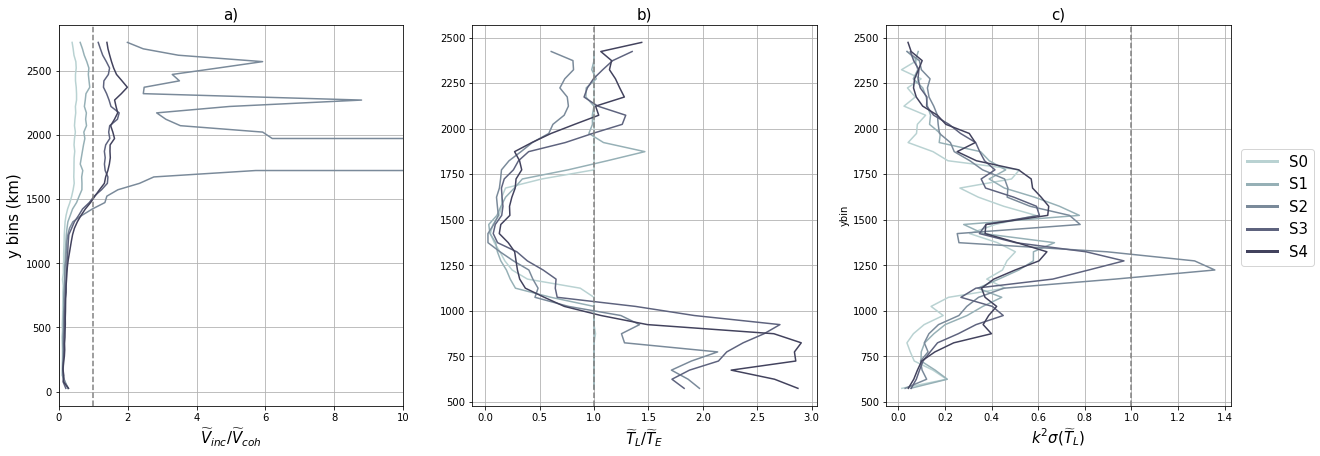

In [40]:
#Same figure but with ratio amplitude : 
size=15

for V in ['_u_avg','_v_avg']:
    fig,ax = plt.subplots(1,3,figsize=(21,7))
    labels = []

    custom_lines = []
    for i,d in enumerate(dsv2_omega):
        x1 = np.sqrt(d['E'+V].sel(param='Vt_ns')/d['E'+V].sel(param='Vt_s'))
        x2 = terms_E[i]
        x3 = terms_adv[i]
        x1.plot.line('-',ax=ax[0],y='ybin',c=colors[i])
        x2.plot.line('-',ax=ax[1],y='ybin',c=colors[i])
        x3.plot.line('-',ax=ax[2],y='ybin',c=colors[i])
        custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
        labels.append('S%s'% i)
    ax[0].grid();ax[1].grid();ax[2].grid()
    ax[0].axvline(1,c='grey',linestyle='--');ax[1].axvline(1,c='grey',linestyle='--');
    ax[2].axvline(1,c='grey',linestyle='--')
    ax[0].set_xlabel(r'$\widetilde{V}_{inc}/\widetilde{V}_{coh}$',fontsize=size);
    ax[1].set_xlabel(r'$\widetilde{T}_L/\widetilde{T}_E$',fontsize=size);
    ax[2].set_xlabel(r'$k^2\sigma(\widetilde{T}_L)$',fontsize=size)
    #ax[2].set_xlabel(r'$k^2\overline{V}^2\overline{T}_L^2(\widetilde{T}_L/\overline{T}_L-\phi_{\mu}(\widetilde{T}_L/\overline{T}_L))$',fontsize=size);
    ax[0].set_ylabel('y bins (km)',fontsize=size);ax[1].set_ylabel('')
    ax[0].set_title('a)',fontsize=size);ax[1].set_title('b)',fontsize=size)
    ax[2].set_title('c)',fontsize=size);ax[0].set_xlim(0,10)
    fig.legend(custom_lines, labels, bbox_to_anchor=((.96,0.65)),fontsize=size)
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure8_review.pdf',bbox_inches='tight')

### Additional figure 3 : 

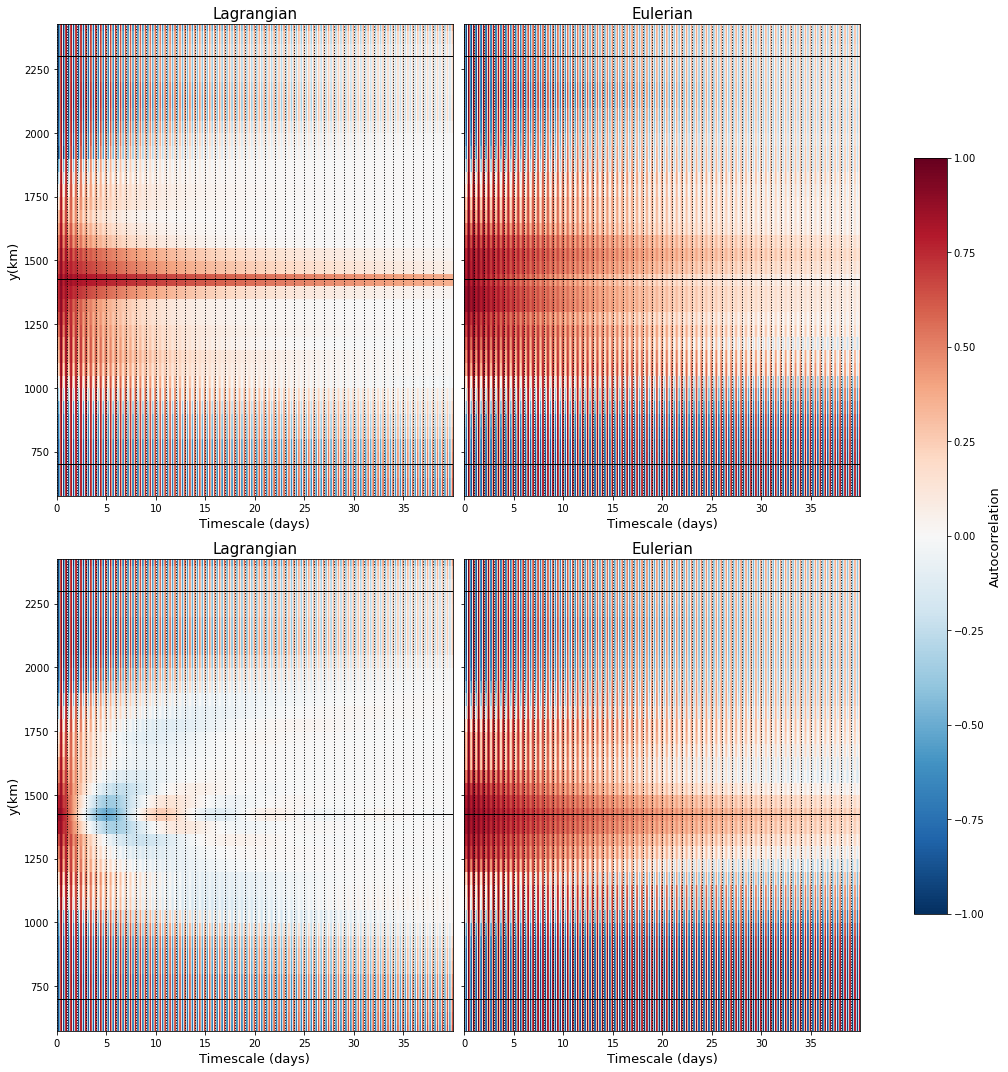

In [15]:
fig,ax = plt.subplots(2,2,figsize=(15,15))
ymax = fit_L['uu_normalized'].dropna(dim='ybin').ybin.max()
ymin = fit_L['uu_normalized'].dropna(dim='ybin').ybin.min()

for V,i in zip(['uu','vv'],range(2)):
    im = fit_L[V+'_normalized'].plot(ax=ax[i,0],y='ybin',add_colorbar=False);ax[i,0].set_ylabel('')
    fit_E[V+'_normalized'].plot(ax=ax[i,1],y='ybin',add_colorbar=False);ax[i,1].set_ylabel('')
    [ax[i,0].axvline(x,linestyle='dotted',color='k',linewidth=1) for x in np.arange(0,40,2*0.5)]
    ax[i,0].set_title('Lagrangian',fontsize=15);ax[i,0].set_ylabel('y(km)',fontsize=13);
    ax[i,0].set_xlabel('Timescale (days)',fontsize=13)
    [ax[i,1].axvline(x,linestyle='dotted',color='k',linewidth=1) for x in np.arange(0,40,2*0.5)]
    ax[i,1].set_title('Eulerian',fontsize=15);ax[i,1].set_yticklabels('')#;ax[i,1].set_ylabel('y(m)',fontsize=15)
    ax[i,1].set_xlabel('Timescale (days)',fontsize=13)
    ax[i,0].set_ylim(ymin,ymax);ax[i,1].set_ylim(ymin,ymax)
    for y in [700,1425,2300]:
        ax[i,0].axhline(y,c='k',linewidth=1)
        ax[i,1].axhline(y,c='k',linewidth=1)
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label('Autocorrelation',size=13)

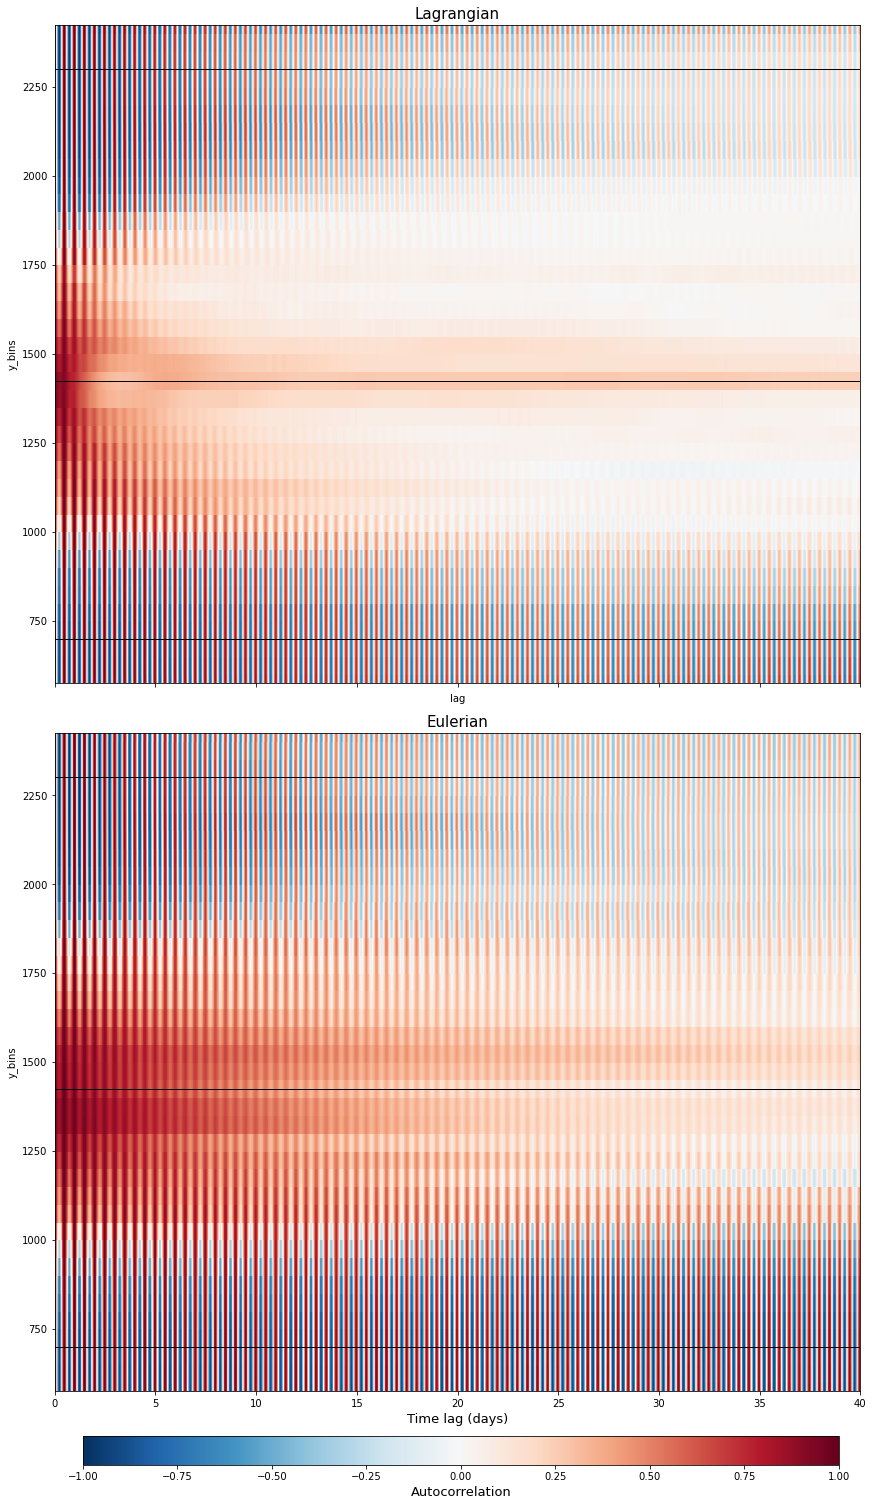

In [42]:
fig,ax = plt.subplots(2,1,figsize=(15,20))
ymax = corrL['uu_normalized'].dropna(dim='y_bins').y_bins.max()
ymin = corrL['uu_normalized'].dropna(dim='y_bins').y_bins.min()
V = 'uu'
#for V,i in zip(['uu','vv'],range(2)):
im = corrL[V+'_normalized'].plot(ax=ax[0],add_colorbar=False)#;ax[0].set_ylabel('')
corrE[V+'_normalized'].plot(ax=ax[1],add_colorbar=False)#;ax[1].set_ylabel('')
#[ax[0].axvline(x,linestyle='dotted',color='k',linewidth=1) for x in np.arange(0,40,4*0.5)]
#ax[i,0].set_title(r'$\;$',fontsize=15);ax[i,0].set_ylabel('y(km)',fontsize=13);
#ax[i,0].set_xlabel('',fontsize=13)
#[ax[1].axvline(x,linestyle='dotted',color='k',linewidth=1) for x in np.arange(0,40,2*0.5)]
#ax[i,1].set_title('',fontsize=15);ax[i,1].set_yticklabels('')#;ax[i,1].set_ylabel('y(m)',fontsize=15)
#ax[i,1].set_xlabel('',fontsize=13)
ax[0].set_ylim(ymin,ymax);ax[1].set_ylim(ymin,ymax)
for y in [700,1425,2300]:
    ax[0].axhline(y,c='k',linewidth=1)
    ax[1].axhline(y,c='k',linewidth=1)
#ax[0].set_xlabel('Time lag (days)',fontsize=13)
ax[1].set_xlabel('Time lag (days)',fontsize=13)
ax[0].set_title('Lagrangian',fontsize=15);ax[1].set_title('Eulerian',fontsize=15);
ax[0].set_xticklabels('')

fig.tight_layout()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.08, -0.02, 0.7, 0.02])
cb = fig.colorbar(im, cax=cbar_ax,orientation = 'horizontal')#
cb.set_label('Autocorrelation',size=13)
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure3_uu.png',bbox_inches='tight')


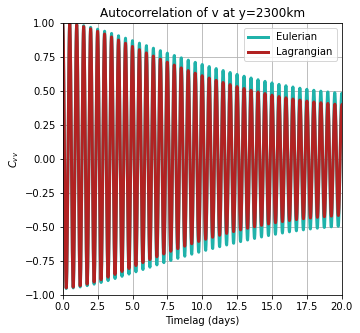

In [16]:
#Illustration method : 
V = 'vv'
y = 2300
import matplotlib as mpl
from matplotlib.patches import Rectangle

ce_fit = 'dimgrey'
cl_fit='silver'

fig,ax = plt.subplots(figsize=(5,5))
corrE[V+'_normalized'].sel(y_bins=y*1e3,method='nearest').plot(c=ce,linewidth = 3,ax=ax,label=('Eulerian '))
corrL[V+'_normalized'].sel(y_bins=y,method='nearest').plot(c=cl,linewidth = 3,ax=ax,label=('Lagrangian'))
ax.set_xlim(0,20);ax.set_ylim(-1,1);ax.grid()
ax.set_ylabel(r'$C_{vv}$')
ax.set_xlabel('Timelag (days)');ax.set_title('Autocorrelation of v at y=%skm'%y)
ax.legend()
fig.savefig('/Users/zcaspar/Documents/Figures/covv_%s_nofit.pdf'%y,bbox_inches='tight')

#### Additional figure 4

Text(0.5, 1.0, 'Eulerian')

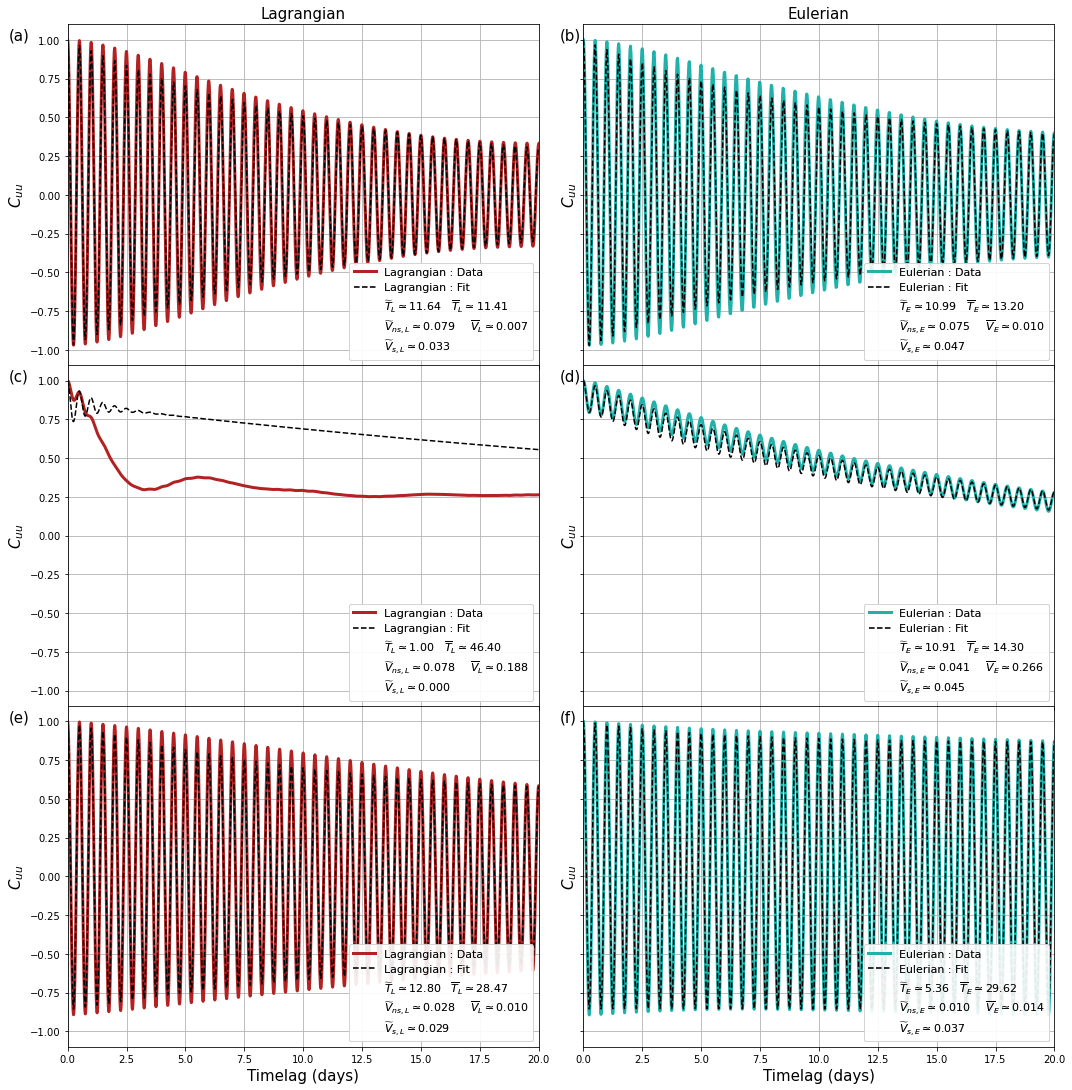

In [13]:
import matplotlib as mpl
from matplotlib.patches import Rectangle

ce_fit = 'k'
cl_fit='k'
#Sections
Y=[2300,1425,700]

props = dict(boxstyle='round', facecolor='w', alpha=0.5)

# place a text box in upper left in axes coords


fig,axs = plt.subplots(3,2,figsize=(15,15),sharex=True, sharey=True,gridspec_kw={'hspace': 0})
V = 'uu'
for i,y in enumerate(Y):
    #for V,ax in zip(['uu','vv'],axs[i,:]):
    #for V in zip(['uu','vv'],axs[i,:]):
    paE = dsv2[-2]['E_'+V[0]+'_avg'].sel(ybin=y,method='nearest').values
    paL = dsv2[-2]['L_'+V[0]+'_avg'].sel(ybin=y,method='nearest').values
    textstrE = '\n'.join((
            r'$\widetilde{T}_E\simeq%.2f\hspace{1}\overline{T}_E\simeq%.2f$' % (paE[0], paE[3]),
            r'$\widetilde{V}_{ns,E}\simeq%.3f\hspace{1.5}\overline{V}_E\simeq%.3f$' % (np.sqrt(paE[1]/2),np.sqrt(paE[4])),
            #r'$\widetilde{V}_{s,E}\simeq%.3f\hspace{1.5}\Omega_E\simeq%.2f$'% (np.sqrt(paE[2]/2),paE[5])
            r'$\widetilde{V}_{s,E}\simeq%.3f$'% (np.sqrt(paE[2]/2))
                            ))
    textstrL = '\n'.join((
            r'$\widetilde{T}_L\simeq%.2f\hspace{1}\overline{T}_L\simeq%.2f$' % (paL[0], paL[3]),
            r'$\widetilde{V}_{ns,L}\simeq%.3f\hspace{1.5}\overline{V}_L\simeq%.3f$' % (np.sqrt(paL[1]),np.sqrt(paL[4])),
#            r'$\widetilde{V}_{s,L}\simeq%.3f\hspace{1.5}\Omega_L\simeq%.2f$'% (np.sqrt(paL[2]),paL[5])
            r'$\widetilde{V}_{s,L}\simeq%.3f$'% (np.sqrt(paL[2]))
                            ))
    corrE[V+'_normalized'].sel(y_bins=y,method='nearest').plot(c=ce,linewidth = 3,ax=axs[i,1],label=('Eulerian : Data'))
    fit_E_omega[V+'_normalized'].sel(ybin=y,method='nearest').plot(c = ce_fit,linestyle='--',ax=axs[i,1],label=('Eulerian : Fit'))
    corrL[V+'_normalized'].sel(y_bins=y,method='nearest').plot(c=cl,linewidth = 3,ax=axs[i,0],label=('Lagrangian : Data'))
    fit_L_omega[V+'_normalized'].sel(ybin=y,method='nearest').plot(c=cl_fit,linestyle='--',ax=axs[i,0],label=('Lagrangian : Fit'))
    handles,labels = axs[i,0].get_legend_handles_labels()
    extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    legendL = axs[i,0].legend(handles[:]+[extra],labels[:]+[textstrL],loc='lower right',framealpha=0.7,fontsize=11)
    axs[i,0].add_artist(legendL)
    handles,labels = axs[i,1].get_legend_handles_labels()
    extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    legendE = axs[i,1].legend(handles[:]+[extra],labels[:]+[textstrE],loc='lower right',framealpha=0.7,fontsize=11);
    axs[i,1].add_artist(legendE)
    for ax in axs[i,:]:
        ax.set_ylim(-1.1,1.1);ax.grid();ax.set_title('')
        ax.set_ylabel(r'$C_{%s}$'%V,fontsize=15);ax.set_xlabel('Timelag (days)',fontsize=15)
        ax.set_xlim(0,20)
        
fig.tight_layout()
for ax,txt in zip(axs[:,0],['(a)','(c)','(e)']):
    ax.text(-2.5,1,txt,fontsize=15)
for ax,txt in zip(axs[:,1],['(b)','(d)','(f)']):
    ax.text(-1.,1,txt,fontsize=15)
axs[0,0].set_title('Lagrangian',fontsize=15)
axs[0,1].set_title('Eulerian',fontsize=15)

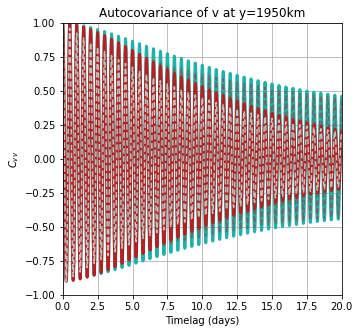

In [10]:
V = 'vv'
y = 1950
import matplotlib as mpl
from matplotlib.patches import Rectangle

ce_fit = 'dimgrey'
cl_fit='silver'

fig,ax = plt.subplots(figsize=(5,5))
corrE[V+'_normalized'].sel(y_bins=y*1e3,method='nearest').plot(c=ce,linewidth = 3,ax=ax,label=('Eulerian : Data'))
fit_E[V+'_normalized'].sel(ybin=y,method='nearest').plot(c = ce_fit,linestyle='--',ax=ax,label=('Eulerian : Fit'))
corrL[V+'_normalized'].sel(y_bins=y,method='nearest').plot(c=cl,linewidth = 3,ax=ax,label=('Lagrangian : Data'))
fit_L[V+'_normalized'].sel(ybin=y,method='nearest').plot(c=cl_fit,linestyle='--',ax=ax,label=('Lagrangian : Fit'))
ax.set_xlim(0,20);ax.set_ylim(-1,1);ax.grid()
ax.set_ylabel(r'$C_{vv}$')
ax.set_xlabel('Timelag (days)');ax.set_title('Autocovariance of v at y=%skm'%y)
#ax.legend(bbox_to_anchor=((1.4,0.5)))
fig.savefig('/Users/zcaspar/Documents/Figures/covv_%s.pdf'%y,bbox_inches='tight')

#### Decomposition figures : 

In [19]:
i = -2

In [20]:
Ct_ns = xr.merge([xr.DataArray((dsv2[i][V].sel(param='Xt_ns')*np.exp(-Tau/dsv2[i][V].sel(param='Tt')))*np.cos(omega*Tau),name=V) for V in ['E_v_avg','L_v_avg']])
Ct_s = xr.merge([xr.DataArray(dsv2[i][V].sel(param='Xt_s')*np.cos(omega*Tau),name=V) for V in ['E_v_avg','L_v_avg']])
Cb = xr.merge([xr.DataArray(dsv2[i][V].sel(param='Xb')*np.cos(2*np.pi*dsv2[i][V].sel(param='Omega')*Tau)*np.exp(-Tau/dsv2[i][V].sel(param='Tb')),name=V) for V in ['E_v_avg','L_v_avg']])

In [21]:
Ctot = Cb+Ct_ns+Ct_s

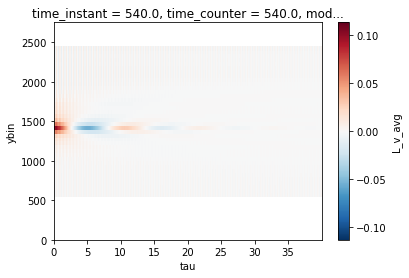

In [22]:
Ctot['L_v_avg'].plot()

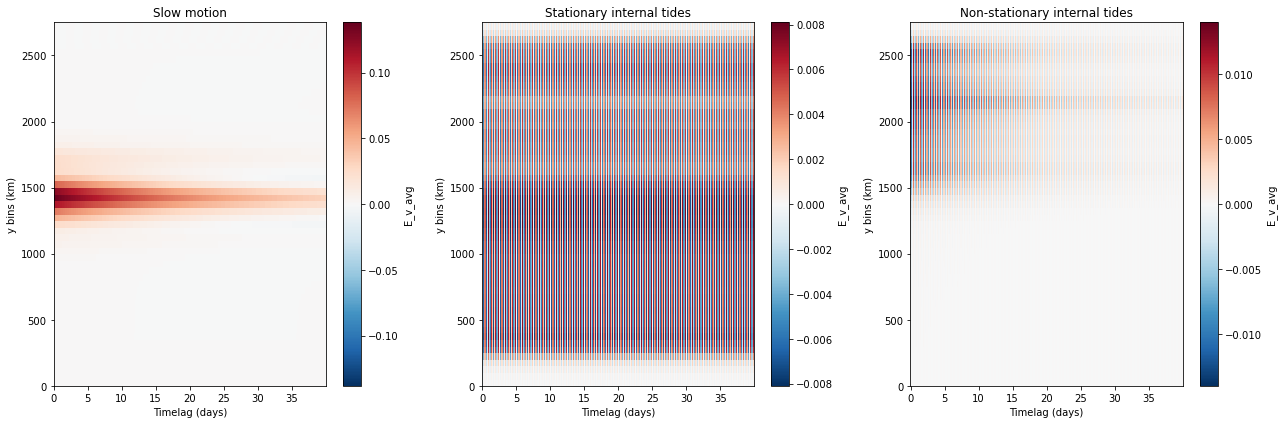

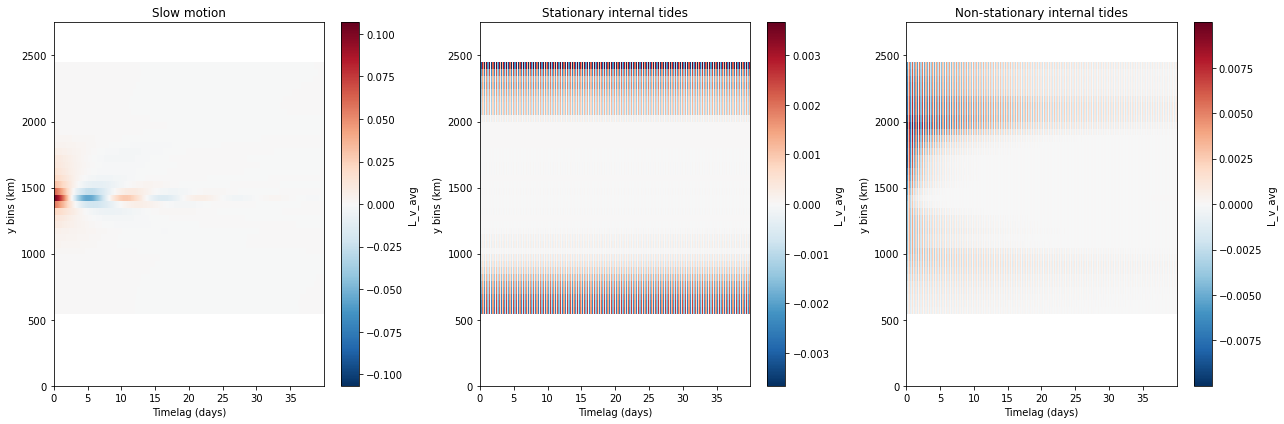

In [23]:
for V in ['E_v_avg','L_v_avg']:
    fig,axs = plt.subplots(1,3,figsize=(18,6))
    Cb[V].plot(ax=axs[0])
    Ct_s[V].plot(ax=axs[1])
    Ct_ns[V].plot(ax=axs[2])
    for title,ax in zip(['Slow motion','Stationary internal tides','Non-stationary internal tides'],axs):
        ax.set_ylabel('y bins (km)')
        ax.set_xlabel('Timelag (days)')
        ax.set_title(title)
    fig.tight_layout()
    plt.show()
#    fig.savefig('/Users/zcaspar/Documents/Figures/Autocov_decomp_'+V[0]+'.png')



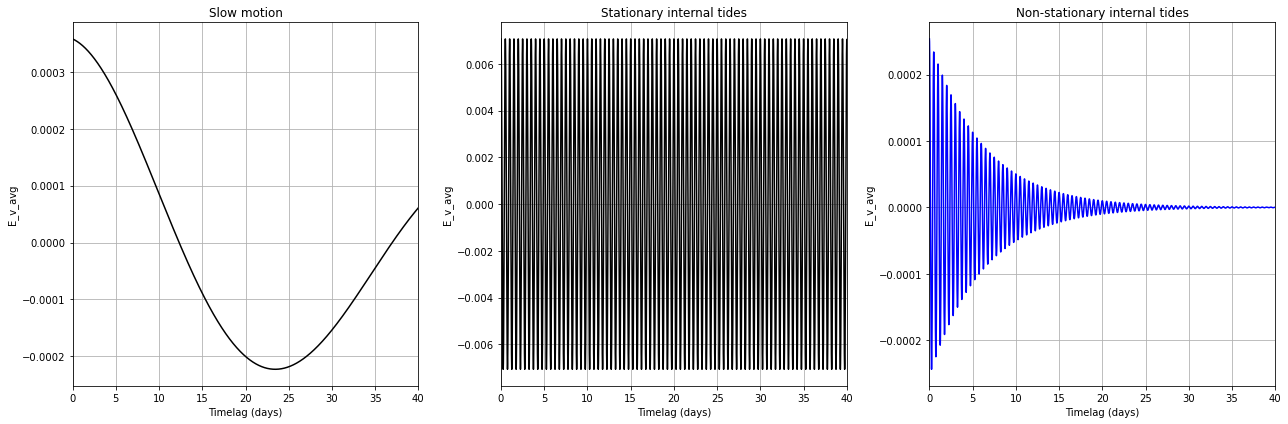

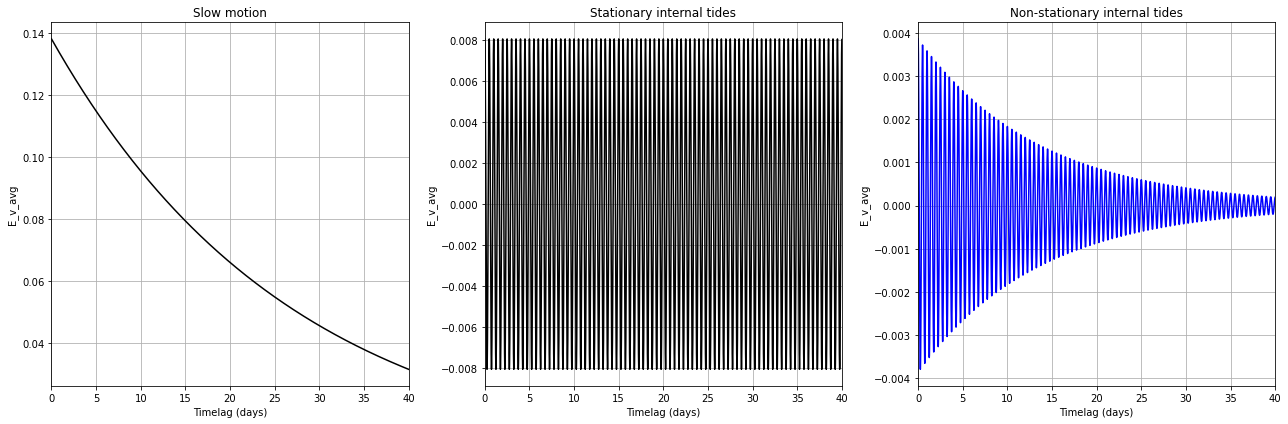

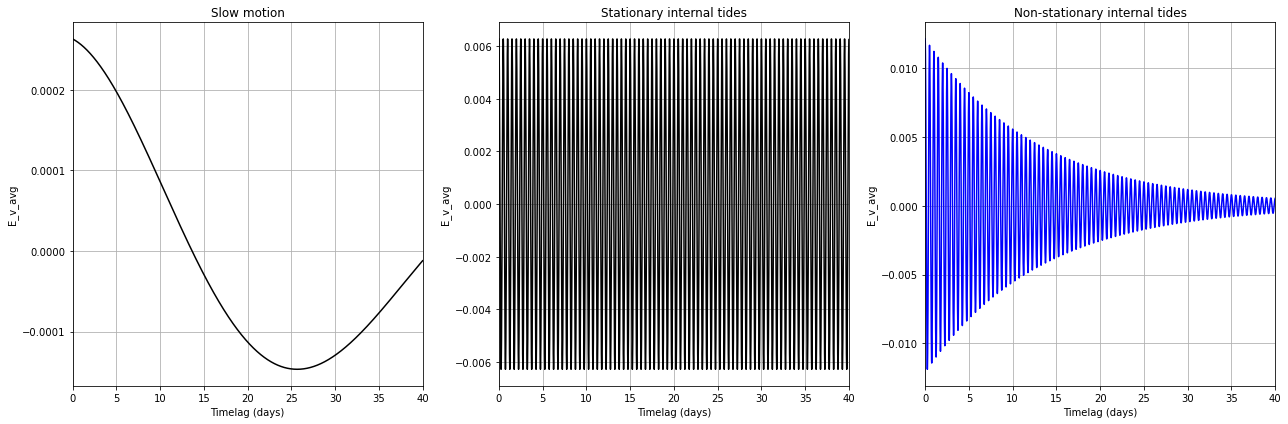

In [24]:
Y = [700,1425,2300]
for y in Y:
    fig,axs = plt.subplots(1,3,figsize=(18,6))
    for V in ['E_v_avg']:#,'L_v_avg']:
        (Cb[V]).sel(ybin=y,method='nearest').plot(ax=axs[0],c='k')
        (Ct_s[V]).sel(ybin=y,method='nearest').plot(ax=axs[1],c='k')
        (Ct_ns[V]).sel(ybin=y,method='nearest').plot(ax=axs[2],c='b')
    for title,ax in zip(['Slow motion','Stationary internal tides','Non-stationary internal tides'],axs):
    #    ax.set_ylabel('y bins (km)')
        ax.set_xlabel('Timelag (days)')
        ax.set_title(title)
        ax.set_xlim(0,40);ax.grid()
    fig.tight_layout()
    plt.show()
#    fig.savefig('/Users/zcaspar/Documents/Figures/Autocov_decomp_%s.png'%y)
#


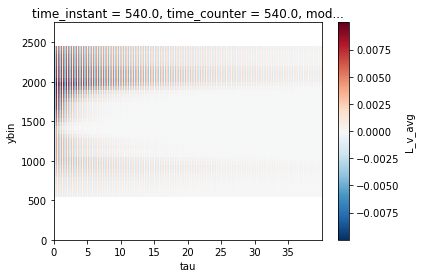

In [34]:
Ct_ns.L_v_avg.plot()

In [85]:
Vinc = 0.1
Vcoh = Vinc/2
inc = Vinc*np.cos(2*np.pi*2*tau)*np.exp(-tau/5)
coh = Vcoh*np.cos(2*np.pi*2*tau)
tot = inc+coh

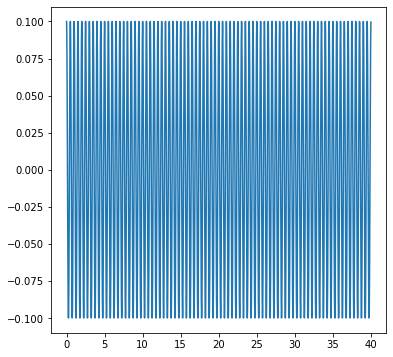

In [75]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(tau,coh)

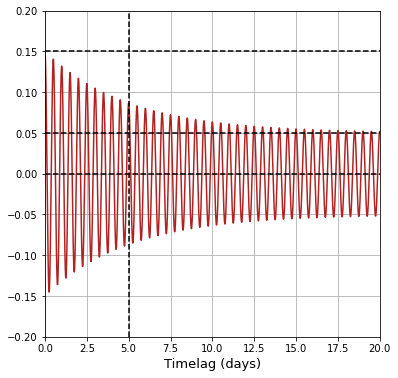

In [94]:
signal = 'total'
fig,ax = plt.subplots(1,1,figsize=(6,6))
#    for V in ['E_v_avg']:#,'L_v_avg']:
if signal =='stationary':
    ax.plot(tau,coh,c='k')
    
if signal =='nonstationary':
   # Vdecorr = (Ct_ns[V].sel(ybin=Y,method='nearest')/np.cos(omega*Tau)
   #           ).sel(tau=dsv2[i][V].sel(param='Tt').sel(ybin=Y,method='nearest').values,method='nearest')
    slope = Vinc/5
    Tt = 5
    ax.plot(tau,inc,c='b')
    ax.plot(tau,-slope*tau+Vinc,'k--')

    ax.axhline(0,c='k',linestyle='--')
    ax.axvline(5,c='k',linestyle='--')
    
   # ax.axhline(Vdecorr,c='k',linestyle='--')
if signal == 'total':
    ax.plot(tau,tot,c='firebrick')
    ax.axvline(5,c='k',linestyle='--')
    ax.axhline(Vcoh,c='k',linestyle='--')
    ax.axhline(Vcoh+Vinc,c='k',linestyle='--')
    ax.axhline(0,c='k',linestyle='--')
  #  for title,ax in zip(['Slow motion','Stationary internal tides','Non-stationary internal tides'],axs):
    #    ax.set_ylabel('y bins (km)')
ax.set_xlabel('Timelag (days)',fontsize=13);ax.set_ylabel('')
ax.set_title('')
#
ax.set_xlim(0,20);ax.grid()
ax.set_ylim(-0.2,0.2)
#fig.tight_layout()
plt.show()
fig.savefig('/Users/zcaspar/Documents/Figures/Autocov_'+signal+'.png')

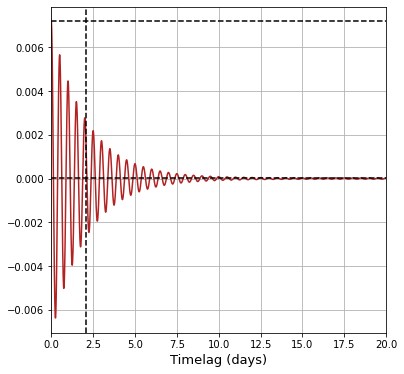

In [61]:
Y = 1500
#[700,1425,2300]
V = 'L_v_avg'
signal = 'total'
fig,ax = plt.subplots(1,1,figsize=(6,6))
#    for V in ['E_v_avg']:#,'L_v_avg']:
if signal =='slow':
    slope = -dsv2[i][V].sel(ybin=Y,method='nearest'
                           ).sel(param='Xb')/dsv2[i][V].sel(ybin=Y,method='nearest').sel(param='Tb')#*np.exp(-1)
 #   Vdecorr = (Cb[V].sel(ybin=Y,method='nearest')
  #            ).sel(tau=dsv2[i][V].sel(param='Tb').sel(ybin=Y,method='nearest').values,method='nearest')
    (Cb[V]).sel(ybin=Y,method='nearest').plot(ax=ax,c='g')
    plt.plot(tau,slope.values*tau+dsv2[i][V].sel(ybin=Y,method='nearest').sel(param='Xb').values,'k--')
    ax.set_ylim(0.0,None)
    ax.axvline(dsv2[i][V].sel(param='Tb').sel(ybin=Y,method='nearest').values,c='k',linestyle='--')
   # ax.axvline(dsv2[i][V].sel(param='Tb').sel(ybin=Y,method='nearest').values,c='k',linestyle='--')
   # ax.axhline(Vdecorr,c='k',linestyle='--')
if signal =='stationary':
    (Ct_s[V]).sel(ybin=Y,method='nearest').plot(ax=ax,c='k')
    
if signal =='nonstationary':
   # Vdecorr = (Ct_ns[V].sel(ybin=Y,method='nearest')/np.cos(omega*Tau)
   #           ).sel(tau=dsv2[i][V].sel(param='Tt').sel(ybin=Y,method='nearest').values,method='nearest')
    slope = -dsv2[i][V].sel(ybin=Y,method='nearest'
                           ).sel(param='Xt_ns')/dsv2[i][V].sel(ybin=Y,method='nearest').sel(param='Tt')
    Tt = dsv2[i][V].sel(ybin=Y,method='nearest').sel(param='Tt')
    (Ct_ns[V]).sel(ybin=Y,method='nearest').plot(ax=ax,c='b')
    ax.plot(tau,slope.values*tau+dsv2[i][V].sel(ybin=Y,method='nearest').sel(param='Xt_ns').values,'k--')

    
    ax.axvline(dsv2[i][V].sel(param='Tt').sel(ybin=Y,method='nearest').values,c='k',linestyle='--')
    
   # ax.axhline(Vdecorr,c='k',linestyle='--')
if signal == 'total':
    (Ct_ns[V]+Ct_s[V]).sel(ybin=Y,method='nearest').plot(ax=ax,c='firebrick')
    slope = -dsv2[i][V].sel(ybin=Y,method='nearest'
                           ).sel(param='Xt_ns')/dsv2[i][V].sel(ybin=Y,method='nearest').sel(param='Tt')
    ax.axvline(dsv2[i][V].sel(param='Tt').sel(ybin=Y,method='nearest').values,c='k',linestyle='--')
    ax.axhline(dsv2[i][V].sel(param='Xt_s').sel(ybin=Y,method='nearest').values,c='k',linestyle='--')
    ax.axhline((dsv2[i][V].sel(param='Xt_ns'
                             ).sel(ybin=Y,method='nearest')+dsv2[i][V].sel(param='Xt_s').sel(ybin=Y,method='nearest')).values,c='k',linestyle='--')

  #  for title,ax in zip(['Slow motion','Stationary internal tides','Non-stationary internal tides'],axs):
    #    ax.set_ylabel('y bins (km)')
ax.set_xlabel('Timelag (days)',fontsize=13);ax.set_ylabel('')
ax.set_title('')
ax.set_xlim(0,20);ax.grid()
#ax.set_ylim(-0.008,0.0075)
#fig.tight_layout()
plt.show()
fig.savefig('/Users/zcaspar/Documents/Figures/Autocov_y%s_'%Y+V[0]+'_'+signal+'.png')

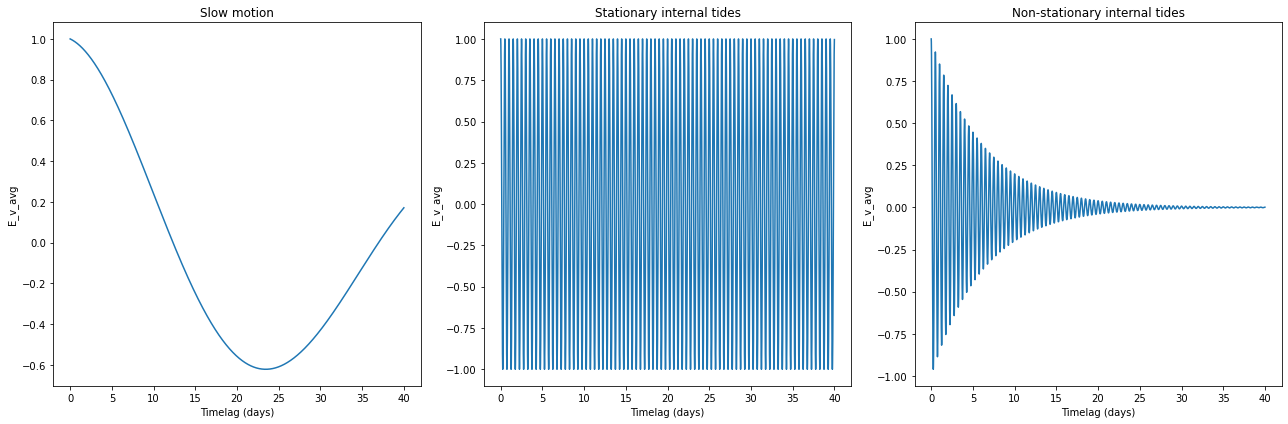

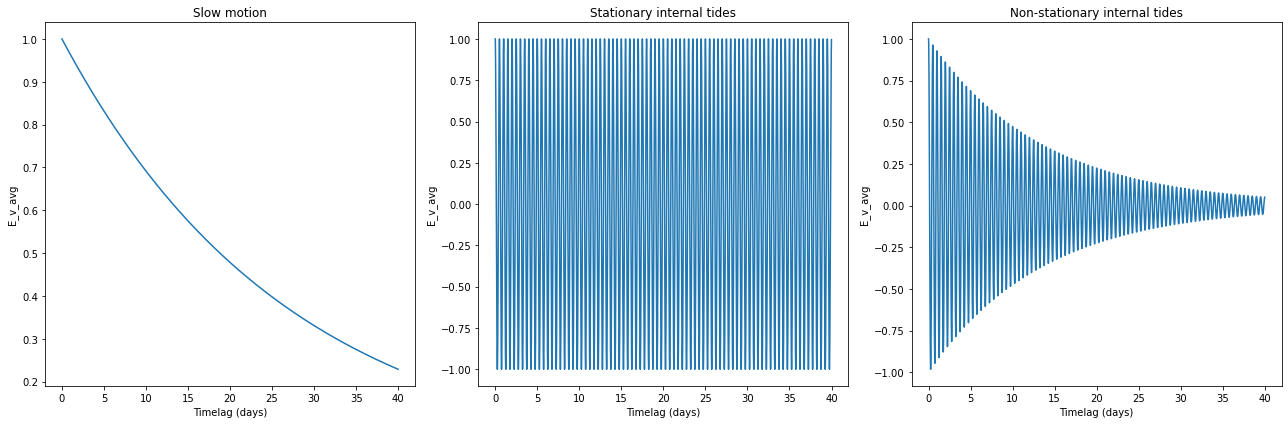

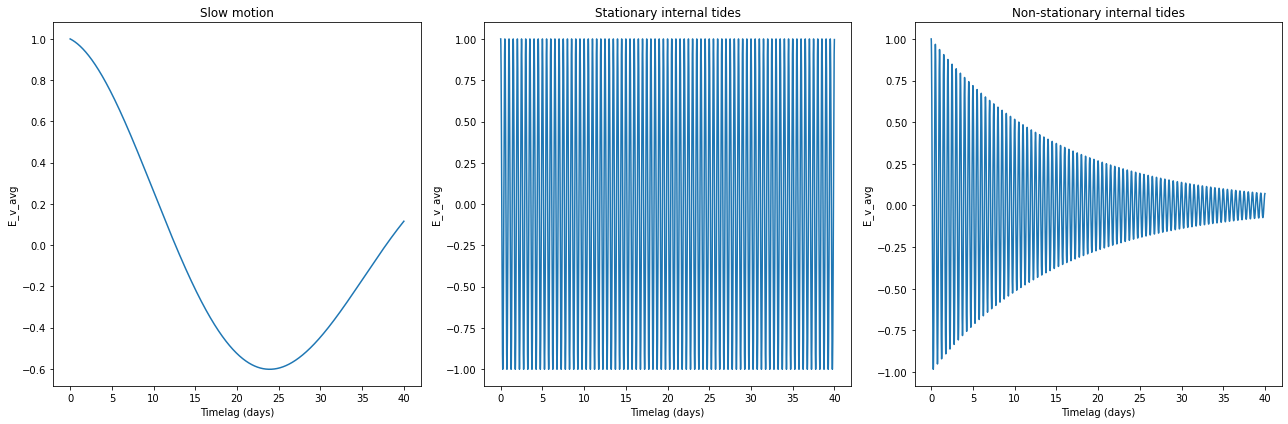

In [14]:
Y = [700,1425,2200]
for y in Y:
    fig,axs = plt.subplots(1,3,figsize=(18,6))
    for V in ['E_v_avg']:#,'L_v_avg']:
        (Cb[V]/Cb[V].isel(tau=0)).sel(ybin=y,method='nearest').plot(ax=axs[0])
        (Ct_s[V]/Ct_s[V].isel(tau=0)).sel(ybin=y,method='nearest').plot(ax=axs[1])
        (Ct_ns[V]/Ct_ns[V].isel(tau=0)).sel(ybin=y,method='nearest').plot(ax=axs[2])
    for title,ax in zip(['Slow motion','Stationary internal tides','Non-stationary internal tides'],axs):
    #    ax.set_ylabel('y bins (km)')
        ax.set_xlabel('Timelag (days)')
        ax.set_title(title)
    fig.tight_layout()
    plt.show()
#fig.savefig('/Users/zcaspar/Documents/Figures/Autocov_decomp.png')




#### Additional figure 5

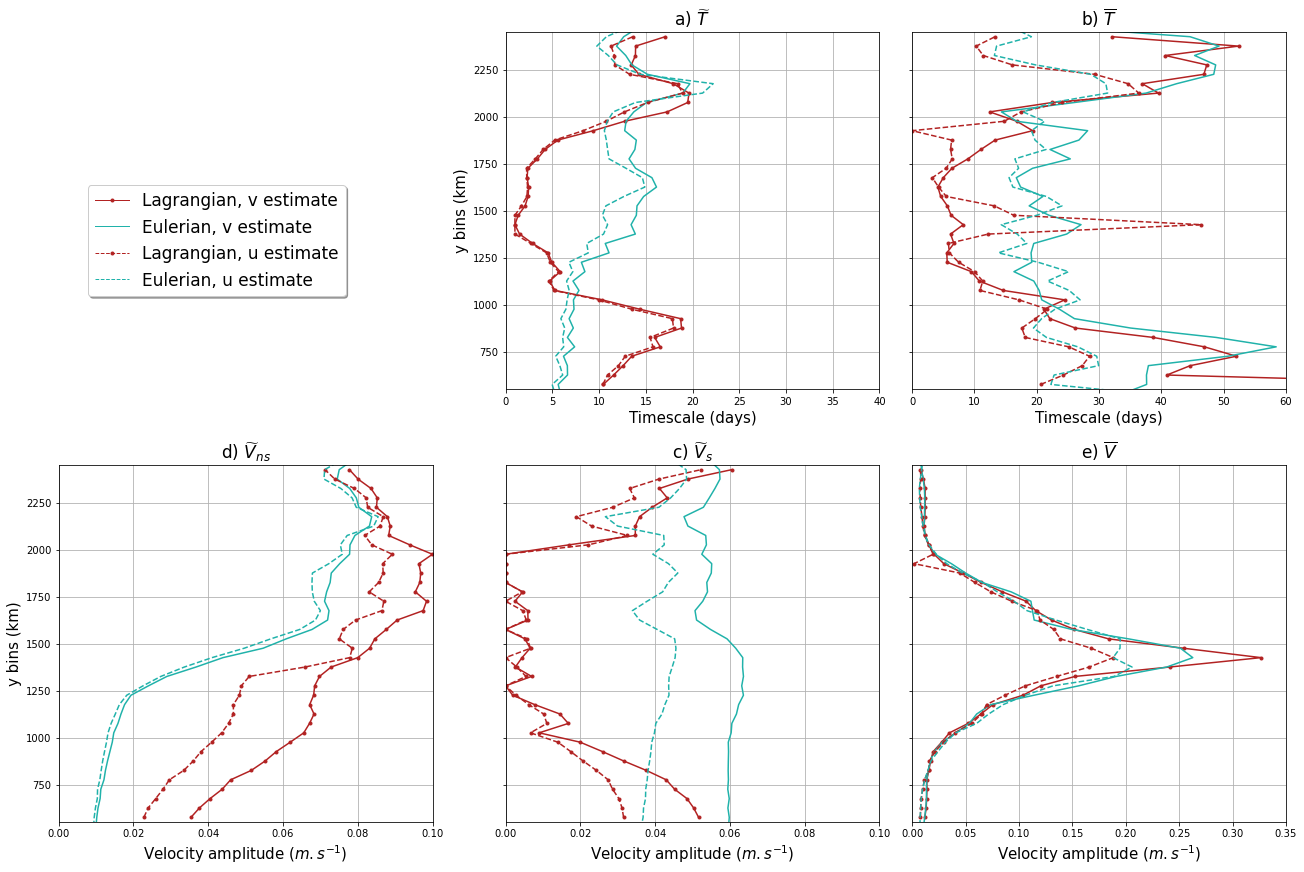

In [74]:
ymax = dsv2[-2]['L_v_avg'].dropna(dim='ybin').ybin.max()
ymin = dsv2[-2]['L_v_avg'].dropna(dim='ybin').ybin.min()
lims_uu = [(0,40),(0,40),(0,0.1),(0,0.1),(0,0.2)]
lims_vv = [(0,40),(0,60),(0,0.1),(0,0.1),(0,0.35)]
title = [r'a) $\widetilde{T}$',r'b) $\overline{T}$',r'd) $\widetilde{V}_{ns}$',r'c) $\widetilde{V}_{s}$',r'e) $\overline{V}$']
labels=[r'Timescale (days)',r'Timescale (days)',r'Velocity amplitude ($m.s^{-1}$)',r'Velocity amplitude ($m.s^{-1}$)',r'Velocity amplitude ($m.s^{-1}$)']
size= 15

axes = []

fig = plt.figure(constrained_layout=True,figsize=(18,12))
spec = gridspec.GridSpec(ncols=6, nrows=2, figure=fig)

ax = fig.add_subplot(spec[0,2:4])
axes.append(ax)
dsv2[-2]['L_v_avg'].sel(param='Tt').plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
dsv2[-2]['E_v_avg'].sel(param='Tt').plot(y='ybin',c=ce,ax=ax,linestyle='-')
dsv2[-2]['L_u_avg'].sel(param='Tt').plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='--')
dsv2[-2]['E_u_avg'].sel(param='Tt').plot(y='ybin',c=ce,ax=ax,linestyle='--')


ax = fig.add_subplot(spec[0,4:],sharey=ax)
axes.append(ax)
dsv2[-2]['L_v_avg'].sel(param='Tb').plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
dsv2[-2]['E_v_avg'].sel(param='Tb').plot(y='ybin',c=ce,ax=ax,linestyle='-')
dsv2[-2]['L_u_avg'].sel(param='Tb').plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='--')
dsv2[-2]['E_u_avg'].sel(param='Tb').plot(y='ybin',c=ce,ax=ax,linestyle='--')


ax = fig.add_subplot(spec[1,:2])
axes.append(ax)
np.sqrt(dsv2[-2]['L_v_avg'].sel(param='Xt_ns')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
np.sqrt(dsv2[-2]['E_v_avg'].sel(param='Xt_ns')/2).plot(y='ybin',c=ce,ax=ax,linestyle='-')
np.sqrt(dsv2[-2]['L_u_avg'].sel(param='Xt_ns')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='--')
np.sqrt(dsv2[-2]['E_u_avg'].sel(param='Xt_ns')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')


ax = fig.add_subplot(spec[1,2:4],sharey=axes[2])
axes.append(ax)
np.sqrt(dsv2[-2]['L_v_avg'].sel(param='Xt_s')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
np.sqrt(dsv2[-2]['E_v_avg'].sel(param='Xt_s')/2).plot(y='ybin',c=ce,ax=ax,linestyle='-')
np.sqrt(dsv2[-2]['L_u_avg'].sel(param='Xt_s')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='--')
np.sqrt(dsv2[-2]['E_u_avg'].sel(param='Xt_s')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')


ax = fig.add_subplot(spec[1,4:],sharey=axes[2])
axes.append(ax)
np.sqrt(dsv2[-2]['L_v_avg'].sel(param='Xb')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
np.sqrt(dsv2[-2]['E_v_avg'].sel(param='Xb')/2).plot(y='ybin',c=ce,ax=ax,linestyle='-')
np.sqrt(dsv2[-2]['L_u_avg'].sel(param='Xb')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='--')
np.sqrt(dsv2[-2]['E_u_avg'].sel(param='Xb')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')

label_legend = ['Lagrangian, v estimate','Eulerian, v estimate','Lagrangian, u estimate','Eulerian, u estimate']

custom_lines = [Line2D([0], [0], color=cl, lw=1,marker='.'),
                Line2D([0], [0], color=ce, lw=1),
                Line2D([0], [0], color=cl, lw=1,marker='.',linestyle='--'),
                Line2D([0], [0], color=ce, lw=1,linestyle='--')]
for i,ax in enumerate(axes):
    ax.grid();ax.set_ylim(ymin-25,ymax+25)
    ax.set_xlim(lims_vv[i]);ax.set_title(title[i],fontsize=size+2)
    ax.set_xlabel(labels[i],fontsize=size);ax.set_ylabel('')
#    ax.legend(custom_lines[:], label_legend[:])
axes[0].set_ylabel('y bins (km)',fontsize=size);axes[2].set_ylabel('y bins (km)',fontsize=size)
plt.setp(axes[1].get_yticklabels(),visible=False)
plt.setp(axes[3].get_yticklabels(),visible=False)
plt.setp(axes[4].get_yticklabels(),visible=False)
fig.legend(custom_lines, label_legend, bbox_to_anchor=((0.27,0.8)),fontsize=size+2,fancybox=True,shadow=True)
plt.show()
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure5.pdf',bbox_inches='tight')


Caption : Estimated eulerian (blue lines) and lagrangian (red lines with circular markers) non-stationarity, $\widetilde{T}$ (a) and decorrelation of the balanced flow, $\overline{T}$ (b) timescales and fast and slow components amplitudes, $\widetilde{V}_{ns}$ (c), $\widetilde{V}_{s}$ (d) and $\overline{V}$ (e).The estimates are found by fitting the theoretical model (ref equation) to the autocorrelation of u (dashed lines) and v (continuous lines).

In [10]:
ymax = dsv2[-2]['L_v_avg'].dropna(dim='ybin').ybin.max()
ymin = dsv2[-2]['L_v_avg'].dropna(dim='ybin').ybin.min()
lims_uu = [(0,40),(0,40),(0,0.1),(0,0.1),(0,0.2)]
lims_vv = [(0,40),(0,60),(0,0.1),(0,0.1),(0,0.35)]
title = [r'a) $\widetilde{T}$',r'b) $\overline{T}$',r'd) $\widetilde{V}_{ns}$',r'c) $\widetilde{V}_{s}$',r'e) $\overline{V}$']
labels=[r'Timescale (days)',r'Timescale (days)',r'Velocity amplitude ($m.s^{-1}$)',r'Velocity amplitude ($m.s^{-1}$)',r'Velocity amplitude ($m.s^{-1}$)']
size= 15

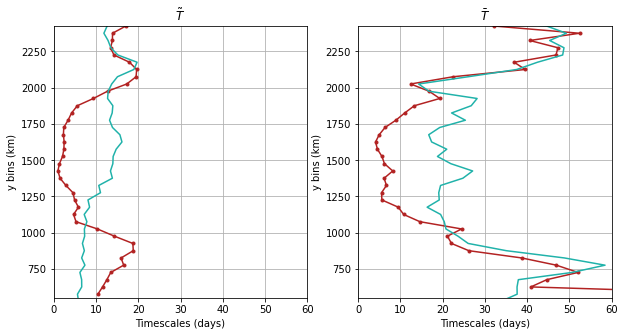

In [24]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
for V,title,ax in zip(['Tt','Tb'],[r'$\tilde T$',r'$\bar T$'],axs):
    dsv2[-2]['L_v_avg'].sel(param=V).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
    dsv2[-2]['E_v_avg'].sel(param=V).plot(y='ybin',c=ce,ax=ax,linestyle='-')

    ax.grid();ax.set_ylabel('y bins (km)');ax.set_ylim(550,2425)
    ax.set_title(title);ax.set_xlim(0,60);ax.set_xlabel('Timescales (days)')
fig.savefig('/Users/zcaspar/Documents/Figures/Figure_Twp7.pdf',bbox_inches='tight')

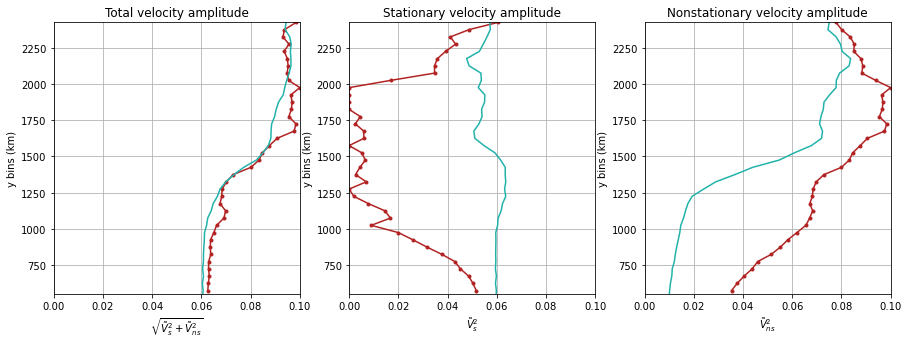

In [23]:
xlabels = [r'$\sqrt{\tilde V_s^2+\tilde V_{ns}^2}$',r'$\tilde V_s^2$',r'$\tilde V_{ns}^2$']
titles = ['Total velocity amplitude','Stationary velocity amplitude','Nonstationary velocity amplitude']
fig,axs = plt.subplots(1,3,figsize=(15,5))
for V,ax in zip(['Xt_s','Xt_ns'],axs[1:]):
    np.sqrt(dsv2[-2]['L_v_avg'].sel(param=V)).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
    np.sqrt(dsv2[-2]['E_v_avg'].sel(param=V)/2).plot(y='ybin',c=ce,ax=ax,linestyle='-')
np.sqrt((dsv2[-2]['L_v_avg'].sel(param='Xt_s')+dsv2[-2]['L_v_avg'].sel(param='Xt_ns'))
       ).plot(y='ybin',c=cl,ax=axs[0],marker='.',linestyle='-')
np.sqrt(dsv2[-2]['E_v_avg'].sel(param='Xt_s')/2+dsv2[-2]['E_v_avg'].sel(param='Xt_ns')/2
       ).plot(y='ybin',c=ce,ax=axs[0],linestyle='-')
for xlabel,title,ax in zip(xlabels,titles,axs):
    ax.grid();ax.set_ylabel('y bins (km)');ax.set_ylim(550,2425)
    ax.set_xlabel(xlabel);ax.set_xlim(0,0.1);ax.set_title(title)
fig.savefig('/Users/zcaspar/Documents/Figures/Figure_amplwp7.pdf',bbox_inches='tight')

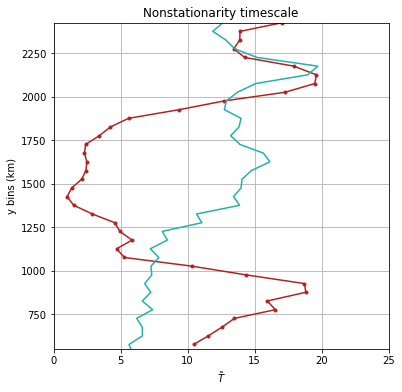

In [31]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
dsv2[-2]['L_v_avg'].sel(param=('Tt')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
dsv2[-2]['E_v_avg'].sel(param=('Tt')).plot(y='ybin',c=ce,ax=ax,linestyle='-')
ax.grid()
ax.set_xlabel(r'$\tilde T$');ax.set_title('Nonstationarity timescale')
ax.set_ylabel('y bins (km)');ax.set_ylim(550,2425);ax.set_xlim(0,25)
fig.savefig('/Users/zcaspar/Documents/Figures/Figure_Ttwp7.pdf',bbox_inches='tight')

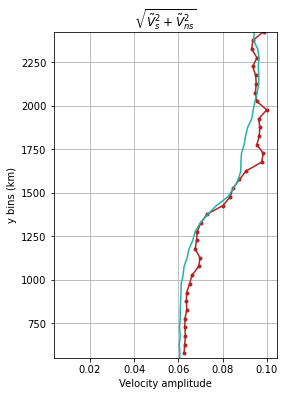

In [12]:
fig,ax = plt.subplots(figsize=(4,6))
np.sqrt((dsv2[-2]['L_v_avg'].sel(param='Xt_s')+dsv2[-2]['L_v_avg'].sel(param='Xt_ns'))).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
np.sqrt(dsv2[-2]['E_v_avg'].sel(param='Xt_s')/2+dsv2[-2]['E_v_avg'].sel(param='Xt_ns')/2).plot(y='ybin',c=ce,ax=ax,linestyle='-')
#np.sqrt((dsv2[-2]['L_u_avg'].sel(param='Xt_s')+dsv2[-2]['L_u_avg'].sel(param='Xt_ns'))).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='--')
#np.sqrt(dsv2[-2]['E_u_avg'].sel(param='Xt_s')/2+dsv2[-2]['E_u_avg'].sel(param='Xt_ns')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')

ax.grid();ax.set_ylim(550,2425);ax.set_title(r'$\sqrt{\tilde V_s^2+\tilde V_{ns}^2}$');ax.set_ylabel('y bins (km)')
ax.set_xlabel('Velocity amplitude')
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure5_supp.pdf',bbox_inches='tight')



<AxesSubplot:xlabel='L_v_avg'>

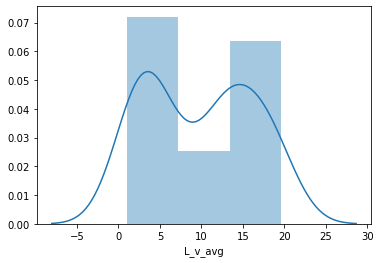

In [28]:
import seaborn as sns
sns.distplot(dsv2[-2]['L_v_avg'].sel(param='Tt'))

$\widetilde{V}_0=\sqrt{\widetilde{V}}$

$s_{\widetilde{V}_0} = \widetilde{V}_0\sqrt{\frac{\partial \widetilde{V}_0}{\partial \widetilde{V}}^2 s_{\widetilde{V}}^2}$ => $\frac{s_{\widetilde{V}_0}}{\widetilde{V}_0} = \frac{s_{\widetilde{V}}}{2\sqrt{\widetilde{V}}}$ 

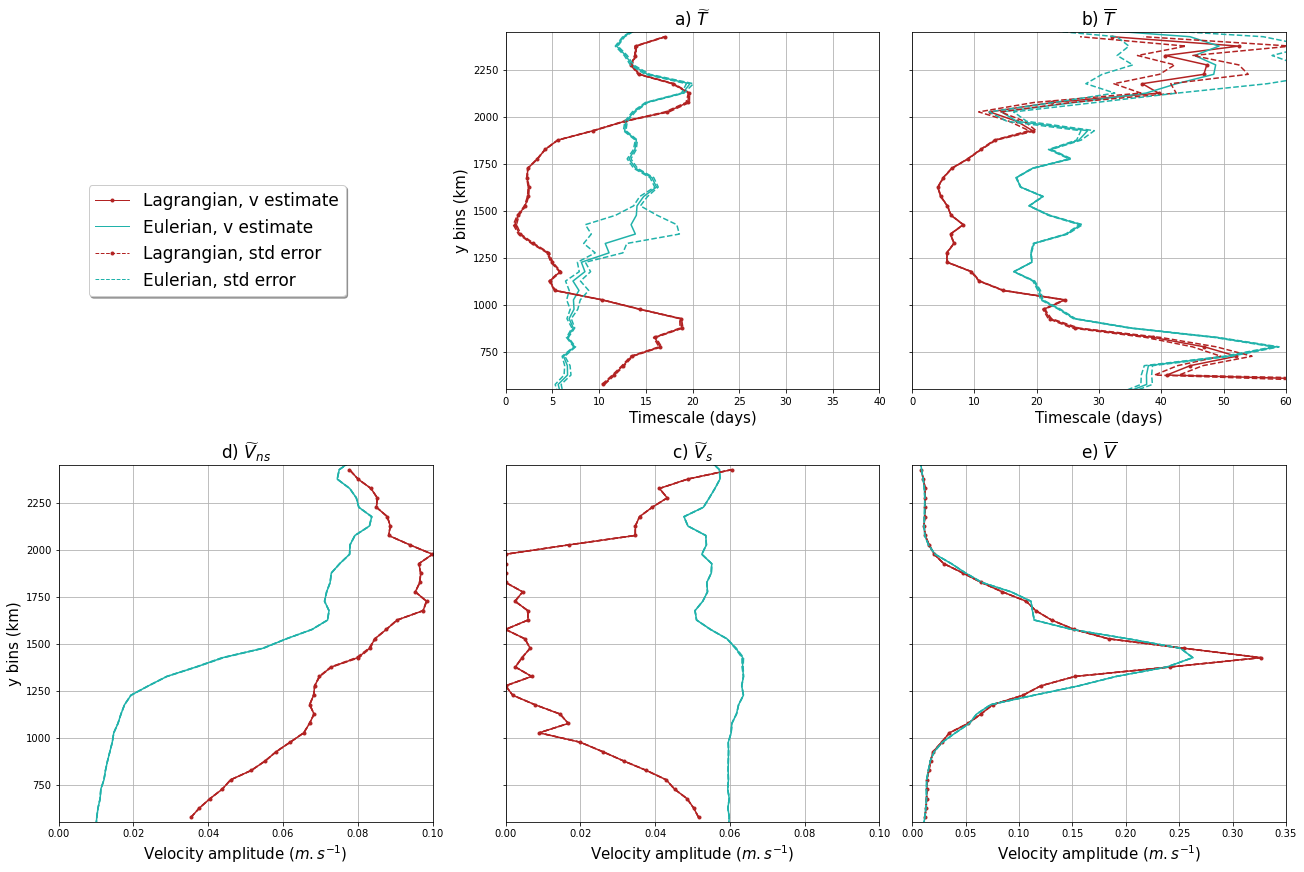

In [73]:
# Parameters estimation from v autocorrealtion with standard deviation error
ymax = dsv2[-2]['L_v_avg'].dropna(dim='ybin').ybin.max()
ymin = dsv2[-2]['L_v_avg'].dropna(dim='ybin').ybin.min()
lims_uu = [(0,40),(0,40),(0,0.1),(0,0.1),(0,0.2)]
lims_vv = [(0,40),(0,60),(0,0.1),(0,0.1),(0,0.35)]
title = [r'a) $\widetilde{T}$',r'b) $\overline{T}$',r'd) $\widetilde{V}_{ns}$',r'c) $\widetilde{V}_{s}$',r'e) $\overline{V}$']
labels=[r'Timescale (days)',r'Timescale (days)',r'Velocity amplitude ($m.s^{-1}$)',r'Velocity amplitude ($m.s^{-1}$)',r'Velocity amplitude ($m.s^{-1}$)']
size= 15

axes = []

fig = plt.figure(constrained_layout=True,figsize=(18,12))
spec = gridspec.GridSpec(ncols=6, nrows=2, figure=fig)

ax = fig.add_subplot(spec[0,2:4])
axes.append(ax)
dsv2[-2]['L_v_avg'].sel(param='Tt').plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
dsv2[-2]['E_v_avg'].sel(param='Tt').plot(y='ybin',c=ce,ax=ax,linestyle='-')
(dsv2[-2]['L_v_avg'].sel(param='Tt')+1.*dsv2[-2]['L_v_error'].sel(param='Tt')).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(dsv2[-2]['L_v_avg'].sel(param='Tt')-1.*dsv2[-2]['L_v_error'].sel(param='Tt')).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(dsv2[-2]['E_v_avg'].sel(param='Tt')+1.*dsv2[-2]['E_v_error'].sel(param='Tt')).plot(y='ybin',c=ce,ax=ax,linestyle='--')
(dsv2[-2]['E_v_avg'].sel(param='Tt')-1.*dsv2[-2]['E_v_error'].sel(param='Tt')).plot(y='ybin',c=ce,ax=ax,linestyle='--')



ax = fig.add_subplot(spec[0,4:],sharey=ax)
axes.append(ax)
dsv2[-2]['L_v_avg'].sel(param='Tb').plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
dsv2[-2]['E_v_avg'].sel(param='Tb').plot(y='ybin',c=ce,ax=ax,linestyle='-')
(dsv2[-2]['L_v_avg'].sel(param='Tb')+1.*dsv2[-2]['L_v_error'].sel(param='Tb')).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(dsv2[-2]['L_v_avg'].sel(param='Tb')-1.*dsv2[-2]['L_v_error'].sel(param='Tb')).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(dsv2[-2]['E_v_avg'].sel(param='Tb')+1.*dsv2[-2]['E_v_error'].sel(param='Tb')).plot(y='ybin',c=ce,ax=ax,linestyle='--')
(dsv2[-2]['E_v_avg'].sel(param='Tb')-1.*dsv2[-2]['E_v_error'].sel(param='Tb')).plot(y='ybin',c=ce,ax=ax,linestyle='--')




ax = fig.add_subplot(spec[1,:2])
axes.append(ax)
np.sqrt(dsv2[-2]['L_v_avg'].sel(param='Xt_ns')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
np.sqrt(dsv2[-2]['E_v_avg'].sel(param='Xt_ns')/2).plot(y='ybin',c=ce,ax=ax,linestyle='-')
(np.sqrt(dsv2[-2]['L_v_avg'].sel(param='Xt_ns'))+1.*dsv2[-2]['L_v_error'].sel(param='Xt_ns')/2).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['L_v_avg'].sel(param='Xt_ns'))-1.*dsv2[-2]['L_v_error'].sel(param='Xt_ns')/2).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['E_v_avg'].sel(param='Xt_ns')/2)+1.*dsv2[-2]['E_v_error'].sel(param='Xt_ns')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['E_v_avg'].sel(param='Xt_ns')/2)-1.*dsv2[-2]['E_v_error'].sel(param='Xt_ns')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')



ax = fig.add_subplot(spec[1,2:4],sharey=axes[2])
axes.append(ax)
np.sqrt(dsv2[-2]['L_v_avg'].sel(param='Xt_s')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
np.sqrt(dsv2[-2]['E_v_avg'].sel(param='Xt_s')/2).plot(y='ybin',c=ce,ax=ax,linestyle='-')
(np.sqrt(dsv2[-2]['L_v_avg'].sel(param='Xt_s'))+1.*dsv2[-2]['L_v_error'].sel(param='Xt_s')/2).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['L_v_avg'].sel(param='Xt_s'))-1.*dsv2[-2]['L_v_error'].sel(param='Xt_s')/2).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['E_v_avg'].sel(param='Xt_s')/2)+1.*dsv2[-2]['E_v_error'].sel(param='Xt_s')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['E_v_avg'].sel(param='Xt_s')/2)-1.*dsv2[-2]['E_v_error'].sel(param='Xt_s')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')







ax = fig.add_subplot(spec[1,4:],sharey=axes[2])
axes.append(ax)
np.sqrt(dsv2[-2]['L_v_avg'].sel(param='Xb')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
np.sqrt(dsv2[-2]['E_v_avg'].sel(param='Xb')/2).plot(y='ybin',c=ce,ax=ax,linestyle='-')
(np.sqrt(dsv2[-2]['L_v_avg'].sel(param='Xb'))+1.*dsv2[-2]['L_v_error'].sel(param='Xb')/2).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['L_v_avg'].sel(param='Xb'))-1.*dsv2[-2]['L_v_error'].sel(param='Xb')/2).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['E_v_avg'].sel(param='Xb')/2)+1.*dsv2[-2]['E_v_error'].sel(param='Xb')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['E_v_avg'].sel(param='Xb')/2)-1.*dsv2[-2]['E_v_error'].sel(param='Xb')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')



label_legend = ['Lagrangian, v estimate','Eulerian, v estimate','Lagrangian, std error','Eulerian, std error']

custom_lines = [Line2D([0], [0], color=cl, lw=1,marker='.'),
                Line2D([0], [0], color=ce, lw=1),
                Line2D([0], [0], color=cl, lw=1,marker='.',linestyle='--'),
                Line2D([0], [0], color=ce, lw=1,linestyle='--')]
for i,ax in enumerate(axes):
    ax.grid();ax.set_ylim(ymin-25,ymax+25)
    ax.set_xlim(lims_vv[i]);ax.set_title(title[i],fontsize=size+2)
    ax.set_xlabel(labels[i],fontsize=size);ax.set_ylabel('')
axes[0].set_ylabel('y bins (km)',fontsize=size);axes[2].set_ylabel('y bins (km)',fontsize=size)
plt.setp(axes[1].get_yticklabels(),visible=False)
plt.setp(axes[3].get_yticklabels(),visible=False)
plt.setp(axes[4].get_yticklabels(),visible=False)
#    ax.legend(custom_lines[:], label_legend[:])
fig.legend(custom_lines, label_legend, bbox_to_anchor=((0.27,0.8)),fontsize=size+2,fancybox=True,shadow=True)
plt.show()

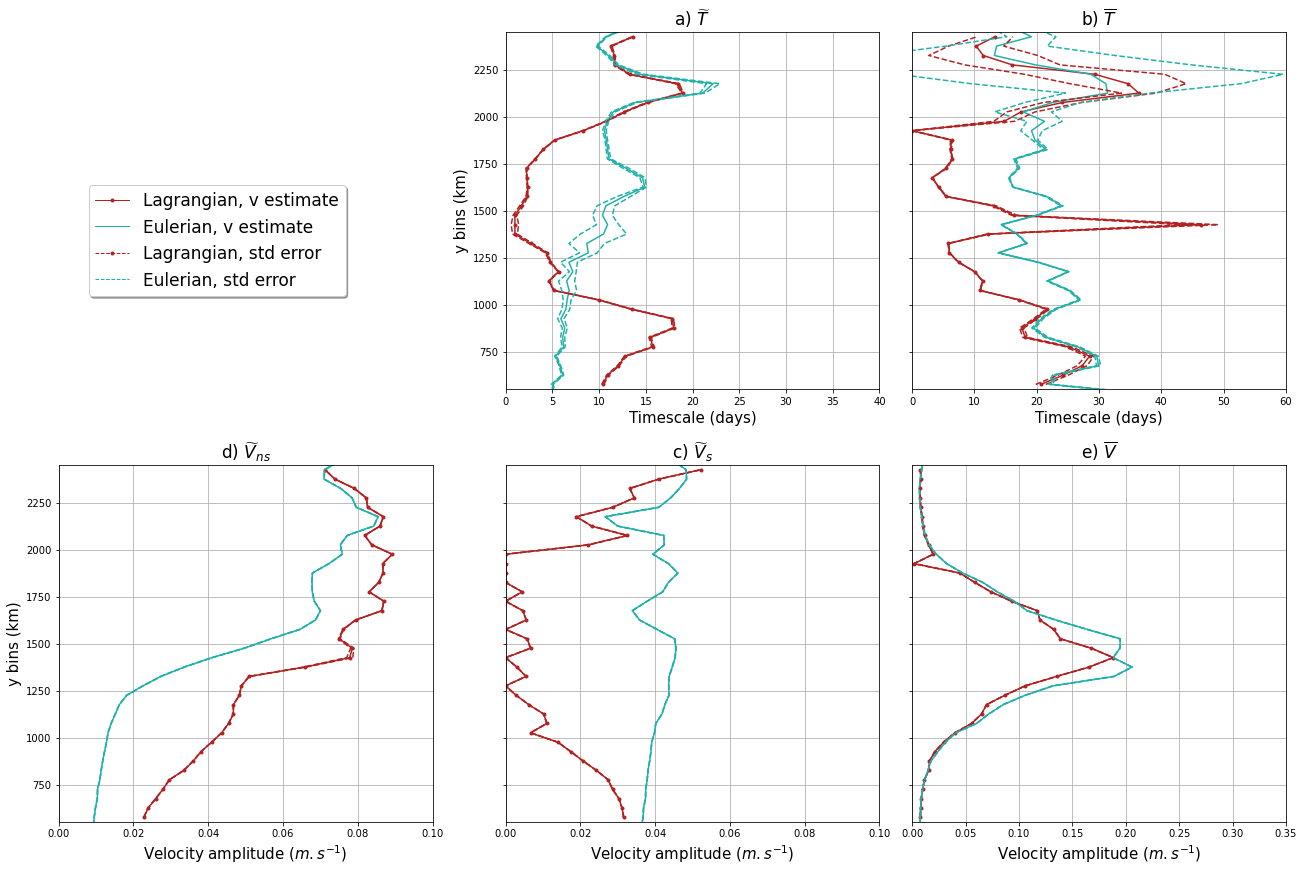

In [75]:
# Parameters estimation from u autocorrealtion with standard deviation error
ymax = dsv2[-2]['L_u_avg'].dropna(dim='ybin').ybin.max()
ymin = dsv2[-2]['L_u_avg'].dropna(dim='ybin').ybin.min()
lims_uu = [(0,40),(0,40),(0,0.1),(0,0.1),(0,0.2)]
lims_vv = [(0,40),(0,60),(0,0.1),(0,0.1),(0,0.35)]
title = [r'a) $\widetilde{T}$',r'b) $\overline{T}$',r'd) $\widetilde{V}_{ns}$',r'c) $\widetilde{V}_{s}$',r'e) $\overline{V}$']
labels=[r'Timescale (days)',r'Timescale (days)',r'Velocity amplitude ($m.s^{-1}$)',r'Velocity amplitude ($m.s^{-1}$)',r'Velocity amplitude ($m.s^{-1}$)']
size= 15

axes = []

fig = plt.figure(constrained_layout=True,figsize=(18,12))
spec = gridspec.GridSpec(ncols=6, nrows=2, figure=fig)

ax = fig.add_subplot(spec[0,2:4])
axes.append(ax)
dsv2[-2]['L_u_avg'].sel(param='Tt').plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
dsv2[-2]['E_u_avg'].sel(param='Tt').plot(y='ybin',c=ce,ax=ax,linestyle='-')
(dsv2[-2]['L_u_avg'].sel(param='Tt')+1.*dsv2[-2]['L_u_error'].sel(param='Tt')).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(dsv2[-2]['L_u_avg'].sel(param='Tt')-1.*dsv2[-2]['L_u_error'].sel(param='Tt')).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(dsv2[-2]['E_u_avg'].sel(param='Tt')+1.*dsv2[-2]['E_u_error'].sel(param='Tt')).plot(y='ybin',c=ce,ax=ax,linestyle='--')
(dsv2[-2]['E_u_avg'].sel(param='Tt')-1.*dsv2[-2]['E_u_error'].sel(param='Tt')).plot(y='ybin',c=ce,ax=ax,linestyle='--')



ax = fig.add_subplot(spec[0,4:],sharey=ax)
axes.append(ax)
dsv2[-2]['L_u_avg'].sel(param='Tb').plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
dsv2[-2]['E_u_avg'].sel(param='Tb').plot(y='ybin',c=ce,ax=ax,linestyle='-')
(dsv2[-2]['L_u_avg'].sel(param='Tb')+1.*dsv2[-2]['L_u_error'].sel(param='Tb')).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(dsv2[-2]['L_u_avg'].sel(param='Tb')-1.*dsv2[-2]['L_u_error'].sel(param='Tb')).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(dsv2[-2]['E_u_avg'].sel(param='Tb')+1.*dsv2[-2]['E_u_error'].sel(param='Tb')).plot(y='ybin',c=ce,ax=ax,linestyle='--')
(dsv2[-2]['E_u_avg'].sel(param='Tb')-1.*dsv2[-2]['E_u_error'].sel(param='Tb')).plot(y='ybin',c=ce,ax=ax,linestyle='--')




ax = fig.add_subplot(spec[1,:2])
axes.append(ax)
np.sqrt(dsv2[-2]['L_u_avg'].sel(param='Xt_ns')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
np.sqrt(dsv2[-2]['E_u_avg'].sel(param='Xt_ns')/2).plot(y='ybin',c=ce,ax=ax,linestyle='-')
(np.sqrt(dsv2[-2]['L_u_avg'].sel(param='Xt_ns'))+1.*dsv2[-2]['L_u_error'].sel(param='Xt_ns')/2).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['L_u_avg'].sel(param='Xt_ns'))-1.*dsv2[-2]['L_u_error'].sel(param='Xt_ns')/2).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['E_u_avg'].sel(param='Xt_ns')/2)+1.*dsv2[-2]['E_u_error'].sel(param='Xt_ns')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['E_u_avg'].sel(param='Xt_ns')/2)-1.*dsv2[-2]['E_u_error'].sel(param='Xt_ns')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')



ax = fig.add_subplot(spec[1,2:4],sharey=axes[2])
axes.append(ax)
np.sqrt(dsv2[-2]['L_u_avg'].sel(param='Xt_s')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
np.sqrt(dsv2[-2]['E_u_avg'].sel(param='Xt_s')/2).plot(y='ybin',c=ce,ax=ax,linestyle='-')
(np.sqrt(dsv2[-2]['L_u_avg'].sel(param='Xt_s'))+1.*dsv2[-2]['L_u_error'].sel(param='Xt_s')/2).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['L_u_avg'].sel(param='Xt_s'))-1.*dsv2[-2]['L_u_error'].sel(param='Xt_s')/2).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['E_u_avg'].sel(param='Xt_s')/2)+1.*dsv2[-2]['E_u_error'].sel(param='Xt_s')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['E_u_avg'].sel(param='Xt_s')/2)-1.*dsv2[-2]['E_u_error'].sel(param='Xt_s')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')







ax = fig.add_subplot(spec[1,4:],sharey=axes[2])
axes.append(ax)
np.sqrt(dsv2[-2]['L_u_avg'].sel(param='Xb')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
np.sqrt(dsv2[-2]['E_u_avg'].sel(param='Xb')/2).plot(y='ybin',c=ce,ax=ax,linestyle='-')
(np.sqrt(dsv2[-2]['L_u_avg'].sel(param='Xb'))+1.*dsv2[-2]['L_u_error'].sel(param='Xb')/2).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['L_u_avg'].sel(param='Xb'))-1.*dsv2[-2]['L_u_error'].sel(param='Xb')/2).plot(y='ybin',c=cl,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['E_u_avg'].sel(param='Xb')/2)+1.*dsv2[-2]['E_u_error'].sel(param='Xb')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')
(np.sqrt(dsv2[-2]['E_u_avg'].sel(param='Xb')/2)-1.*dsv2[-2]['E_u_error'].sel(param='Xb')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')



label_legend = ['Lagrangian, v estimate','Eulerian, v estimate','Lagrangian, std error','Eulerian, std error']

custom_lines = [Line2D([0], [0], color=cl, lw=1,marker='.'),
                Line2D([0], [0], color=ce, lw=1),
                Line2D([0], [0], color=cl, lw=1,marker='.',linestyle='--'),
                Line2D([0], [0], color=ce, lw=1,linestyle='--')]
for i,ax in enumerate(axes):
    ax.grid();ax.set_ylim(ymin-25,ymax+25)
    ax.set_xlim(lims_vv[i]);ax.set_title(title[i],fontsize=size+2)
    ax.set_xlabel(labels[i],fontsize=size);ax.set_ylabel('')
axes[0].set_ylabel('y bins (km)',fontsize=size);axes[2].set_ylabel('y bins (km)',fontsize=size)
plt.setp(axes[1].get_yticklabels(),visible=False)
plt.setp(axes[3].get_yticklabels(),visible=False)
plt.setp(axes[4].get_yticklabels(),visible=False)
#    ax.legend(custom_lines[:], label_legend[:])
fig.legend(custom_lines, label_legend, bbox_to_anchor=((0.27,0.8)),fontsize=size+2,fancybox=True,shadow=True)
plt.show()

### Figure 6 : 

Caption : Estimated parameters for five simulations. (a) Lagrangian and eulerian internal tides nonstationary timescales, $\widetilde{T}$. Fast components nonstationary and stationary velocity amplitudes, $\widetilde{V}_{ns}$ (c) and $\widetilde{V}_s$ (d). Slow component velocity amplitude, $\overline{V}$ (b) is also represented. Timescales lower than 1 day and larger than 40 days were not allowed by our fitting procedure.

### Additional figure : same as figure 6 but with estimation from autocovariance of u

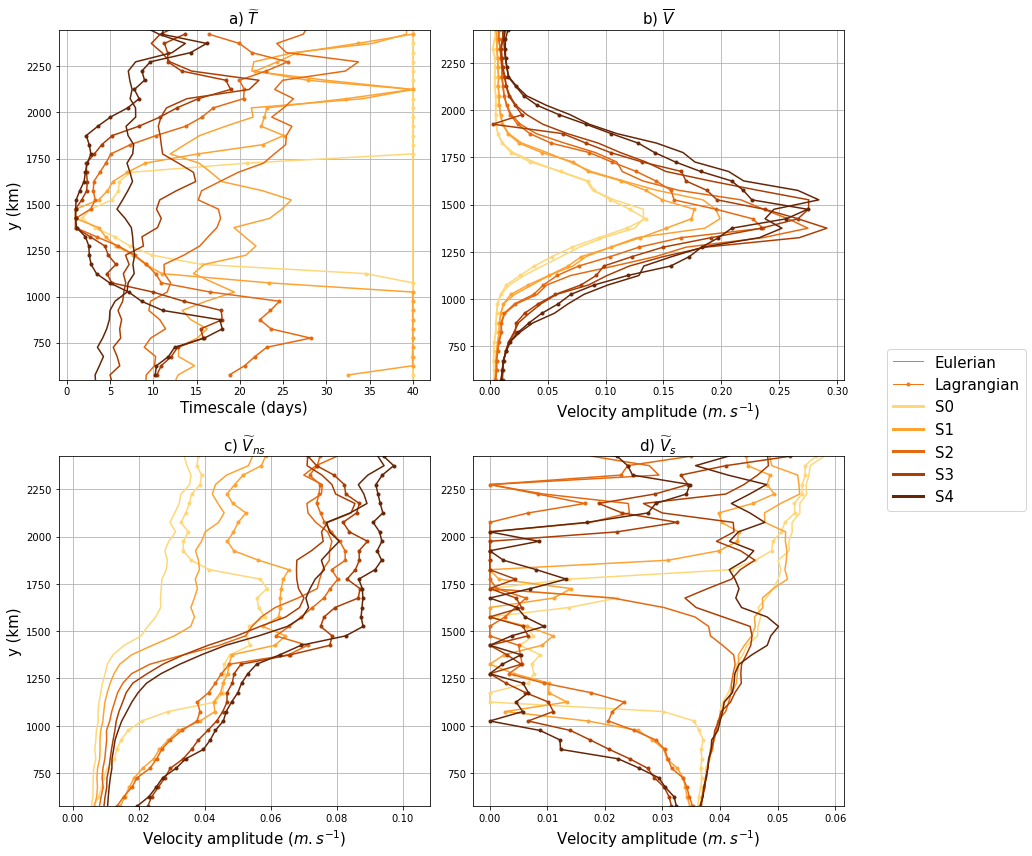

In [117]:
lims_vv = [(0,40),(0,0.35),(0,0.12),(0,0.12)]
V = '_u_avg'

fig,ax = plt.subplots(2,2,figsize=(12,12))

#for pa,title,lim,ax in zip(['Tt','Tb'],titles[:2],lims_vv[:2],axes[0,:]):
labels = ['Eulerian','Lagrangian']
cmap = plt.get_cmap('YlOrBr')
custom_lines = [
                Line2D([0], [0], color=cmap(.6), lw=1),
                Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
               ]
ymax = np.min([d['L'+V].dropna(dim='ybin').ybin.max() for d in dsv2])
ymin = np.max([d['L'+V].dropna(dim='ybin').ybin.min() for d in dsv2])
for i,d in enumerate(dsv2):
    d['L'+V].sel(param='Tt').plot(y='ybin',c=colors[i],ax=ax[0,0],marker='.')
    d['E'+V].sel(param='Tt').plot(y='ybin',c=colors[i],ax=ax[0,0])
    custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
    labels.append('S%s'% i)
    if i!=3:
        (np.sqrt(2*d['L'+V].sel(param='Xb'))).plot(y='ybin',c=colors[i],ax=ax[0,1],marker='.')
        (np.sqrt(2*d['E'+V].sel(param='Xb'))).plot(y='ybin', c=colors[i],ax=ax[0,1])
    else:
        (np.sqrt(2*d['L'+V].sel(param='Xb'))).plot(y='ybin',c=colors[i],ax=ax[0,1],marker='.')
        (np.sqrt(2*d['E'+V].sel(param='Xb')/2)).plot(y='ybin', c=colors[i],ax=ax[0,1])
    
    for a,pa,title in zip(ax[1,:],['Xt_ns','Xt_s'],[r'c) $\widetilde{V}_{ns}$',r'd) $\widetilde{V}_{s}$']):
        if i!=3:
            (np.sqrt(d['L'+V].sel(param=pa))).plot(y='ybin',c=colors[i],ax=a,marker='.')
            (np.sqrt(d['E'+V].sel(param=pa))).plot(y='ybin', c=colors[i],ax=a)
        else:
            (np.sqrt(d['L'+V].sel(param=pa))).plot(y='ybin',c=colors[i],ax=a,marker='.')
            (np.sqrt(d['E'+V].sel(param=pa)/2)).plot(y='ybin', c=colors[i],ax=a)
        a.grid();a.set_title(title,fontsize=size);a.set_ylabel('');
        a.set_xlabel(r'Velocity amplitude ($m.s^{-1}$)',fontsize=size)
        a.set_ylim(ymin,ymax)
        #a.legend(custom_lines,labels)
    ax[0,0].set_ylabel('y (km)',fontsize=size);ax[1,0].set_ylabel('y (km)',fontsize=size);
    ax[0,0].grid();ax[0,1].grid();ax[0,1].set_ylabel('')
    ax[0,0].set_xlabel('Timescale (days)',fontsize=size);ax[0,1].set_xlabel('Velocity amplitude ($m.s^{-1}$)',fontsize=size)
    #;ax[0,1].legend(custom_lines, labels)
    ax[0,0].set_title(r'a) $\widetilde{T}$',fontsize=size);ax[0,1].set_title(r'b) $\overline{V}$',fontsize=size)
    ax[0,0].set_ylim(ymin-25,ymax+25);ax[0,1].set_ylim(ymin,ymax)
fig.legend(custom_lines, labels, bbox_to_anchor=((1.2,0.6)),fontsize=size)
fig.tight_layout()
plt.show()
#fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/params_paper_V2.pdf',bbox_inches='tight')

### Supplementary figure : total amplitude

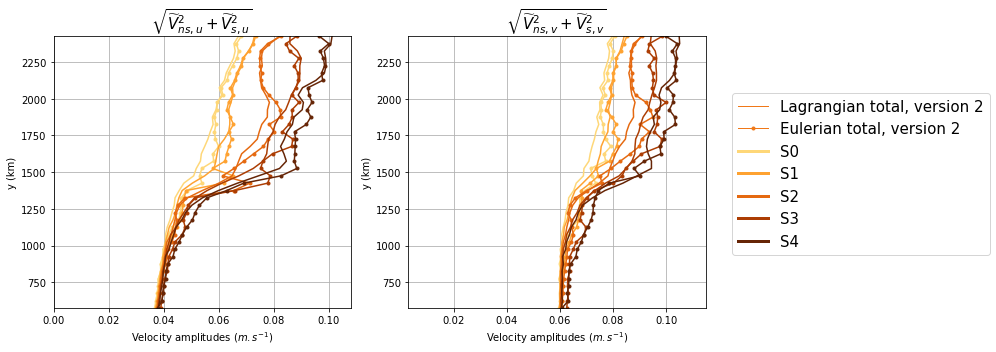

In [14]:
V = '_v_avg'
size=15
ymax = np.min([d['L'+V].dropna(dim='ybin').ybin.max() for d in dsv2])
ymin = np.max([d['L'+V].dropna(dim='ybin').ybin.min() for d in dsv2])
fig,axes = plt.subplots(1,2,figsize=(10,5))
for pa,title,ax in zip(['_u_avg','_v_avg'],[r'$\sqrt{\widetilde{V}_{ns,u}^2+\widetilde{V}_{s,u}^2}$',r'$\sqrt{\widetilde{V}_{ns,v}^2+\widetilde{V}_{s,v}^2}$'],axes):
    labels = ['Lagrangian total, version 2','Eulerian total, version 2']

    cmap = plt.get_cmap('YlOrBr')
    custom_lines = [
                    Line2D([0], [0], color=cmap(.6), lw=1),
                    Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
                    ]
    for i, d in enumerate(dsv2):
        if i!=3:
            #np.sqrt(dsv1[i]['L'+pa].sel(param='Xtilde')).plot(y='ybin',c=colors[i],ax=ax)
            #np.sqrt(dsv1[i]['E'+pa].sel(param='Xtilde')).plot(y='ybin',c=colors[i],ax=ax)

            (np.sqrt(dsv2[i]['E'+pa].sel(param='Xt_ns')+dsv2[i]['E'+pa].sel(param='Xt_s'))).plot(y='ybin',c=colors[i],ax=ax,linestyle='-')
            (np.sqrt(dsv2[i]['L'+pa].sel(param='Xt_ns')+dsv2[i]['L'+pa].sel(param='Xt_s'))).plot(y='ybin',c=colors[i],ax=ax,marker='.',linestyle='-')
            custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
            labels.append('S%s'% i)
        else : 
           # np.sqrt(dsv1[i]['L'+pa].sel(param='Xtilde')).plot(y='ybin',c=colors[i],ax=ax)
           # np.sqrt(dsv1[i]['E'+pa].sel(param='Xtilde')/2).plot(y='ybin',c=colors[i],ax=ax)

            (np.sqrt(dsv2[i]['E'+pa].sel(param='Xt_ns')/2+dsv2[i]['E'+pa].sel(param='Xt_s')/2)).plot(y='ybin',c=colors[i],ax=ax,linestyle='-')
            (np.sqrt(dsv2[i]['L'+pa].sel(param='Xt_ns')+dsv2[i]['L'+pa].sel(param='Xt_s'))).plot(y='ybin',c=colors[i],ax=ax,marker='.',linestyle='-')
            custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
            labels.append('S%s'% i)
        #ax.set_xlim(0,0.12);ax.set_xlabel('')
        ax.grid();ax.set_title(title,fontsize=15)
        ax.set_xlabel(r'Velocity amplitudes ($m.s^{-1}$)');ax.set_ylabel('y (km)')
        ax.set_ylim(ymin-25,ymax+25);ax.set_ylim(ymin,ymax)
fig.tight_layout()
fig.legend(custom_lines, labels, bbox_to_anchor=((1.39,0.75)),fontsize=size)


fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Vtot_supp.pdf')

### Figures : predicted Lagrangian autocovariance

In [20]:
def Ctilde(tau,T,Tb,Lt,U,Xt_ns,Xt_s):
    return (Xt_s+Xt_ns*np.exp(-t1(tau,T)))*np.exp(-t2(tau,Tb,Lt,U)-t3(tau,Tb,Lt,U))
def C_fit(tau,Tt,Xt_ns,Xt_s):
    return Xt_s+Xt_ns*np.exp(-tau/Tt)

In [22]:
Te_v2 = [xr.merge([d.E_u_avg.sel(param='Tt'),d.E_v_avg.sel(param='Tt')]) for d in dsv2]
Tl_v2 = [xr.merge([d.L_u_avg.sel(param='Tt'),d.L_v_avg.sel(param='Tt')]) for d in dsv2]
Tbe_v2 = [xr.merge([d.E_u_avg.sel(param='Tb'),d.E_v_avg.sel(param='Tb')]) for d in dsv2]
Tbl_v2 = [xr.merge([d.L_u_avg.sel(param='Tb'),d.L_v_avg.sel(param='Tb')]) for d in dsv2]
Xbl_v2 = [xr.merge([d.L_u_avg.sel(param='Xb'),d.L_v_avg.sel(param='Xb')]) for d in dsv2]
Xbe_v2 = [xr.merge([d.E_u_avg.sel(param='Xb'),d.E_v_avg.sel(param='Xb')]) for d in dsv2]



In [23]:
C_fits_L = [C_fit(Tau,Tl_v2[i]['L'+V],dsv2[i]['L'+V].sel(param='Xt_ns'),dsv2[i]['L'+V].sel(param='Xt_s')
                 ) for i in range(len(dsv2))]
C_fits_E = [C_fit(Tau,Te_v2[i]['E'+V],dsv2[i]['E'+V].sel(param='Xt_ns'),dsv2[i]['E'+V].sel(param='Xt_s')
                 ) for i in range(len(dsv2))]
CthL = [Cth(Tau,Te_v2[i]['E'+V],Tbl_v2[i]['L'+V],Ltilde_mean[i],np.sqrt(2*Xbl_v2[i]['L'+V]),dsv2[i]['E'+V].sel(param='Xt_ns'),dsv2[i]['E'+V].sel(param='Xt_s')
           ) for i in range(len(dsv2))]
for i in range(len(dsv2)):
    if i!=2:
        C_fits_L[i] = C_fits_L[i].drop('time_instant') 
        C_fits_E[i] = C_fits_E[i].drop('time_instant') 
        CthL[i] = CthL[i].drop('time_instant') 
    if i==3:
       # C_th_E[i] = C_th_E[i]/2
        C_fits_E[i] = C_fits_E[i]/2
       # C_th_L[i] = C_th_L[i]/2
        CthL[i] = CthL[i]/2



In [24]:
vmodes = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_waves_modes*'))] #local
Lt = [vm.lwave.sel(mode=1)*1e3 for vm in vmodes]
Ltilde = [L.assign_coords({'y_bins' : L.y_rho*1e-3}) for L in Lt]
Lt_mean = [L.groupby_bins('y_bins',Xbe_v2[i]['E_v_avg'].ybin+25,include_lowest=False).mean() for i,L in enumerate(Ltilde)]
Lt_mean_omega = [L.groupby_bins('y_bins',Xbe_v2_omega[i]['E_v_avg'].ybin+25,include_lowest=False).mean() for i,L in enumerate(Ltilde)]


Ltilde_mean = [Ltm.assign_coords({'y_bins_bins':[yy.mid for yy in Ltm.y_bins_bins.values]}).rename({'y_bins_bins':'ybin'}) for Ltm in Lt_mean]
Ltilde_mean_omega = [Ltm.assign_coords({'y_bins_bins':[yy.mid for yy in Ltm.y_bins_bins.values]}).rename({'y_bins_bins':'ybin'}) for Ltm in Lt_mean_omega]



In [25]:
C_fit_L = xr.concat(C_fits_L,dim='wp')
C_fit_E = xr.concat(C_fits_E,dim='wp')
CthL = xr.concat(CthL,dim='wp')
C_comp = xr.Dataset(data_vars = {'fit_L':C_fit_L,'fit_E':C_fit_E,'th':CthL},
                    coords={'tau':C_fit_E.tau.values,'wp':np.arange(0,5),'ybin':C_fit_E.ybin.values})


/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

### Figure 7 : 

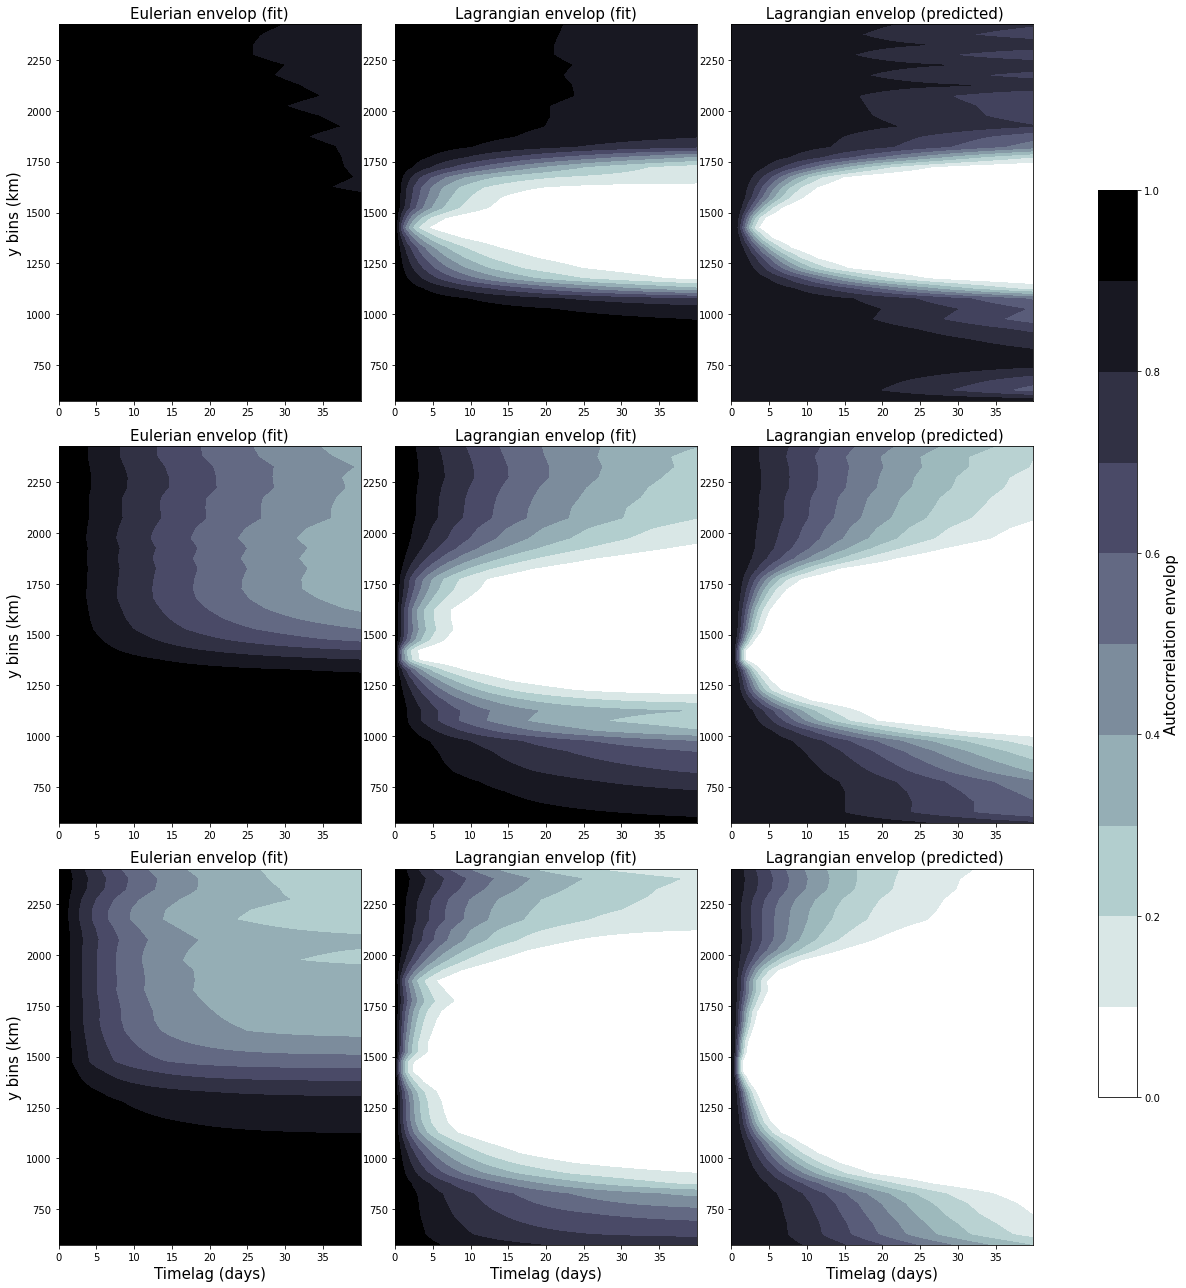

In [25]:
size = 15
cmap = 'bone_r'
lev=11
fig,axs = plt.subplots(3,3,figsize=(18,18))
for i,S in enumerate(C_comp.wp.values[::2]):
    ax = axs[i,:]
    m = 0#np.min([C_comp.fit_E.sel(wp=S).min(),C_comp.fit_L.sel(wp=S).min(),C_comp.th_E.sel(wp=S).min()])
    M = 1#np.max([C_comp.fit_E.sel(wp=S).max(),C_comp.fit_L.sel(wp=S).max(),C_comp.th_E.sel(wp=S).max()])
    im = (C_comp.fit_E.sel(wp=S)/C_comp.fit_E.sel(wp=S).isel(tau=0)).plot.contourf(ax=ax[0],vmin=m,vmax=M,cmap=cmap,levels=lev,add_colorbar=False)
    (C_comp.fit_L.sel(wp=S)/C_comp.fit_L.sel(wp=S).isel(tau=0)).plot.contourf(ax=ax[1],vmin=m,vmax=M,cmap=cmap,levels=lev,add_colorbar=False)
    (C_comp.th.sel(wp=S)/C_comp.th.sel(wp=S).isel(tau=1)).plot.contourf(ax=ax[2],vmin=m,vmax=M,cmap=cmap,levels=lev,add_colorbar=False)
     
    for a,title in zip(ax,['Eulerian envelop (fit)','Lagrangian envelop (fit)',' Lagrangian envelop (predicted)']):
        a.set_xlabel('',fontsize=size);a.set_ylim(C_comp.fit_L.dropna(dim='ybin').ybin.min(),C_comp.fit_L.dropna(dim='ybin').ybin.max())
        a.set_title(title,fontsize=size);a.set_ylabel('')
    ax[0].set_ylabel('y bins (km)',fontsize=size)
axs[2,0].set_xlabel('Timelag (days)',fontsize=size);axs[2,1].set_xlabel('Timelag (days)',fontsize=size);
axs[2,2].set_xlabel('Timelag (days)',fontsize=size)
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label('Autocorrelation envelop',size=size)
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure7.png',bbox_inches='tight')

Caption : Amplitude of the envelop of fast oscillation in autocorrelation functions for 3 simulations (corresponding to rows i the figure). From top to bottom the jet's strength increases. The envelop of the fitted Eulerian (left column) and Lagrangian (middle column) autocorrelation as well as the predicted Lagrangian autocorrelation (right column) are plotted.

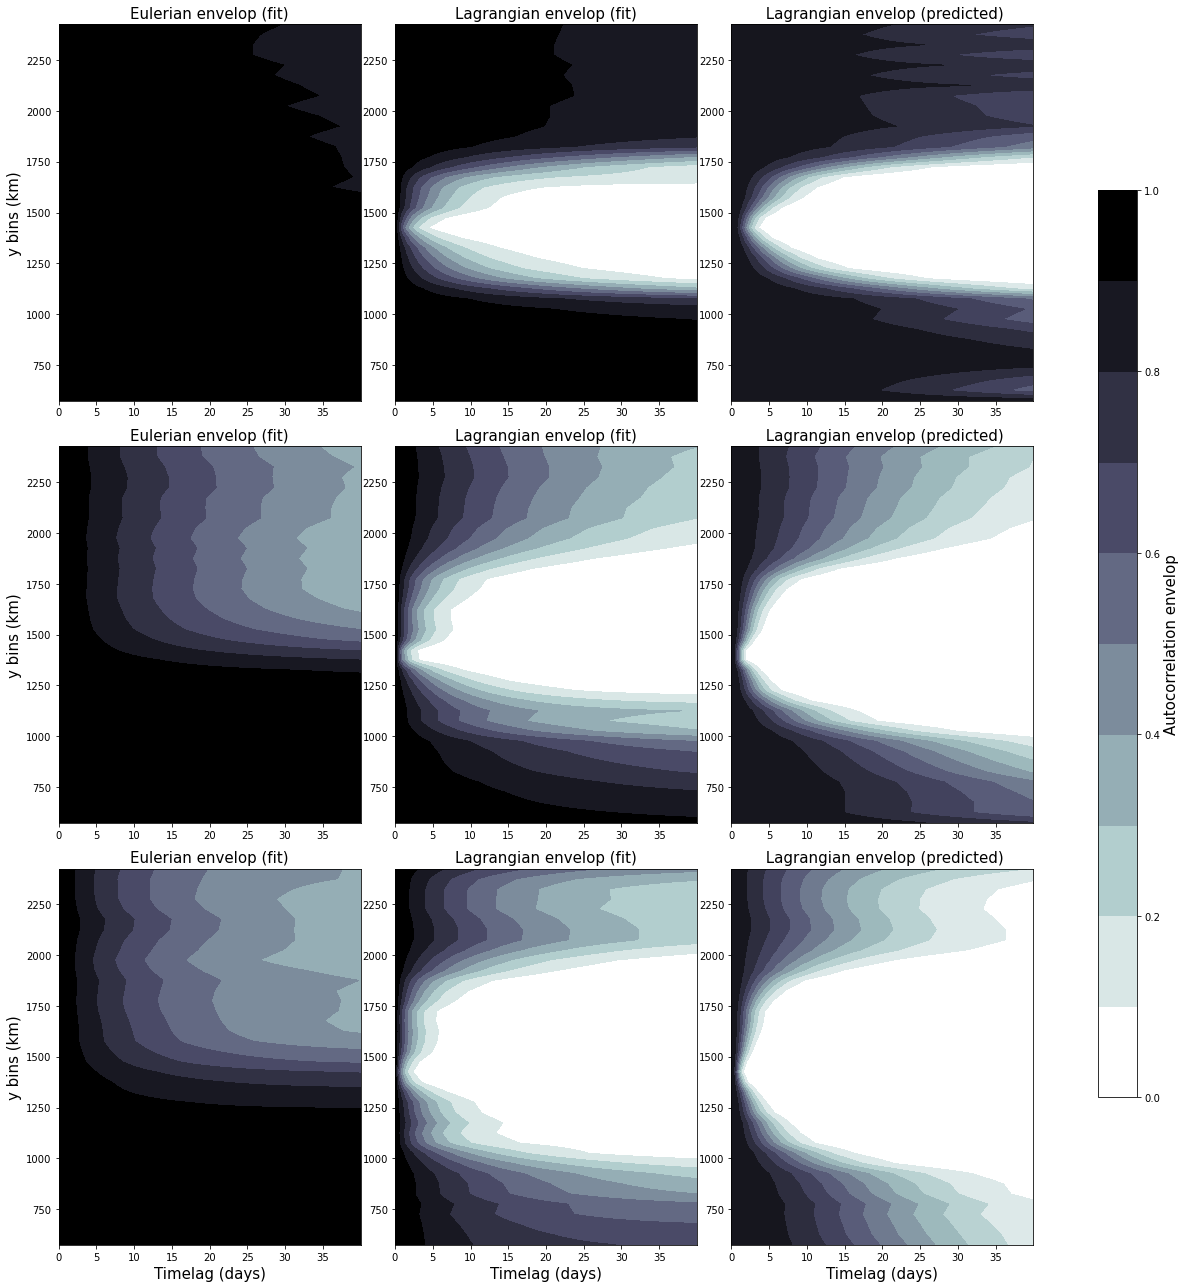

In [28]:
size = 15
cmap = 'bone_r'
lev=11
fig,axs = plt.subplots(3,3,figsize=(18,18))
for i,S in enumerate(C_comp.wp.values[::2]):
    ax = axs[i,:]
    m = 0#np.min([C_comp.fit_E.sel(wp=S).min(),C_comp.fit_L.sel(wp=S).min(),C_comp.th_E.sel(wp=S).min()])
    M = 1#np.max([C_comp.fit_E.sel(wp=S).max(),C_comp.fit_L.sel(wp=S).max(),C_comp.th_E.sel(wp=S).max()])
    im = (C_comp.fit_E.sel(wp=S)/C_comp.fit_E.sel(wp=S).isel(tau=0)).plot.contourf(ax=ax[0],vmin=m,vmax=M,cmap=cmap,levels=lev,add_colorbar=False)
    (C_comp.fit_L.sel(wp=S)/C_comp.fit_L.sel(wp=S).isel(tau=0)).plot.contourf(ax=ax[1],vmin=m,vmax=M,cmap=cmap,levels=lev,add_colorbar=False)
    (C_comp.th.sel(wp=S)/C_comp.th.sel(wp=S).isel(tau=1)).plot.contourf(ax=ax[2],vmin=m,vmax=M,cmap=cmap,levels=lev,add_colorbar=False)
     
    for a,title in zip(ax,['Eulerian envelop (fit)','Lagrangian envelop (fit)',' Lagrangian envelop (predicted)']):
        a.set_xlabel('',fontsize=size);a.set_ylim(C_comp.fit_L.dropna(dim='ybin').ybin.min(),C_comp.fit_L.dropna(dim='ybin').ybin.max())
        a.set_title(title,fontsize=size);a.set_ylabel('')
    ax[0].set_ylabel('y bins (km)',fontsize=size)
axs[2,0].set_xlabel('Timelag (days)',fontsize=size);axs[2,1].set_xlabel('Timelag (days)',fontsize=size);
axs[2,2].set_xlabel('Timelag (days)',fontsize=size)
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label('Autocorrelation envelop',size=size)
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure7.png',bbox_inches='tight')

### Figure 8

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

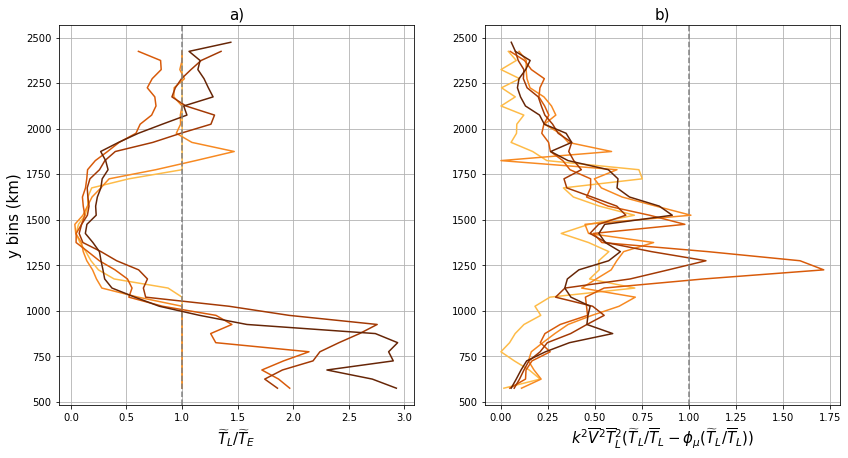

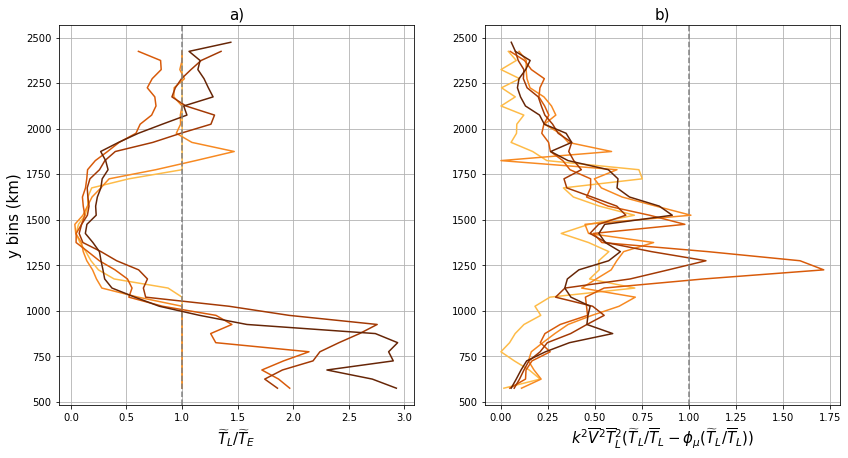

In [19]:
size=15
for V in ['_u_avg','_v_avg']:
    fig,ax = plt.subplots(1,2,figsize=(14,7))
    for i,d in enumerate(dsv2):
        #x1 = Tl_v2[i]['L'+V]/Te_v2[i]['E'+V]
        #x2 = Tbl_v2[i]['L'+V]**2*phi_mu(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V])**2*(2*np.pi/Ltilde_mean[i])**2*(2*Xbe_v2[i]['E_v_avg']*(3600*24)**2)
        #x3 = (2*np.pi/Ltilde_mean[i])**2*(2*Xbe_v2[i]['E_v_avg']*(3600*24)**2)*Tl_v2[i]['L'+V]*Tbl_v2[i]['L'+V]*phi_sigma(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V])
        #x4 = Tl_v2[i]['L'+V]/Tbl_v2[i]['L'+V]
        x1 = terms_E[i]
        x2 = terms_adv[i]
        x1.plot.line('-',ax=ax[0],y='ybin',c=colors[i])
        x2.plot.line('-',ax=ax[1],y='ybin',c=colors[i])
    ax[0].grid();ax[1].grid();
    ax[0].axvline(1,c='grey',linestyle='--');ax[1].axvline(1,c='grey',linestyle='--')
    ax[0].set_xlabel(r'$\widetilde{T}_L/\widetilde{T}_E$',fontsize=size);
    ax[1].set_xlabel(r'$k^2\overline{V}^2\overline{T}_L^2(\widetilde{T}_L/\overline{T}_L-\phi_{\mu}(\widetilde{T}_L/\overline{T}_L))$',fontsize=size);
    ax[0].set_ylabel('y bins (km)',fontsize=size);ax[1].set_ylabel('')
    ax[0].set_title('a)',fontsize=size);ax[1].set_title('b)',fontsize=size)
#fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure8_bis.pdf',bbox_inches='tight')

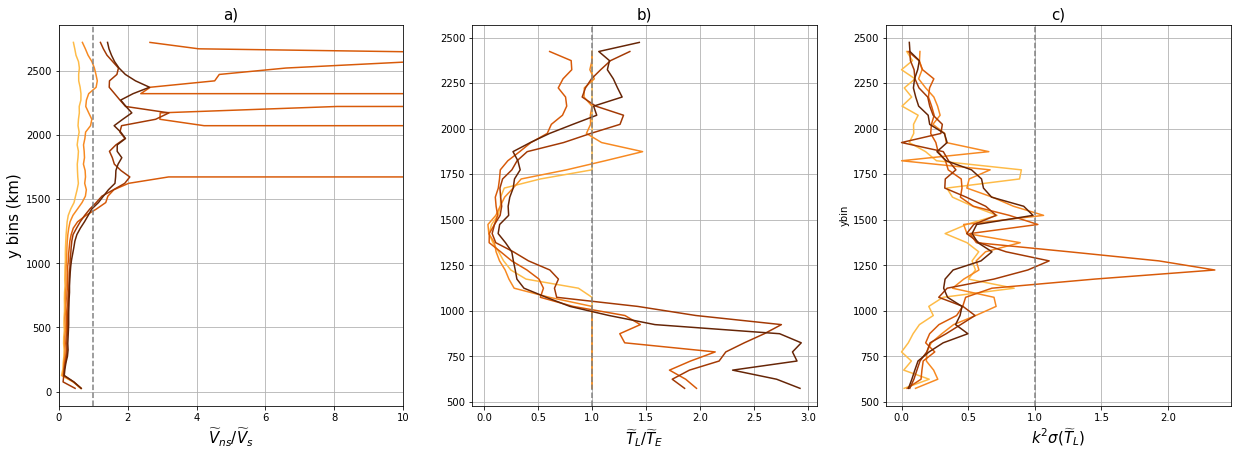

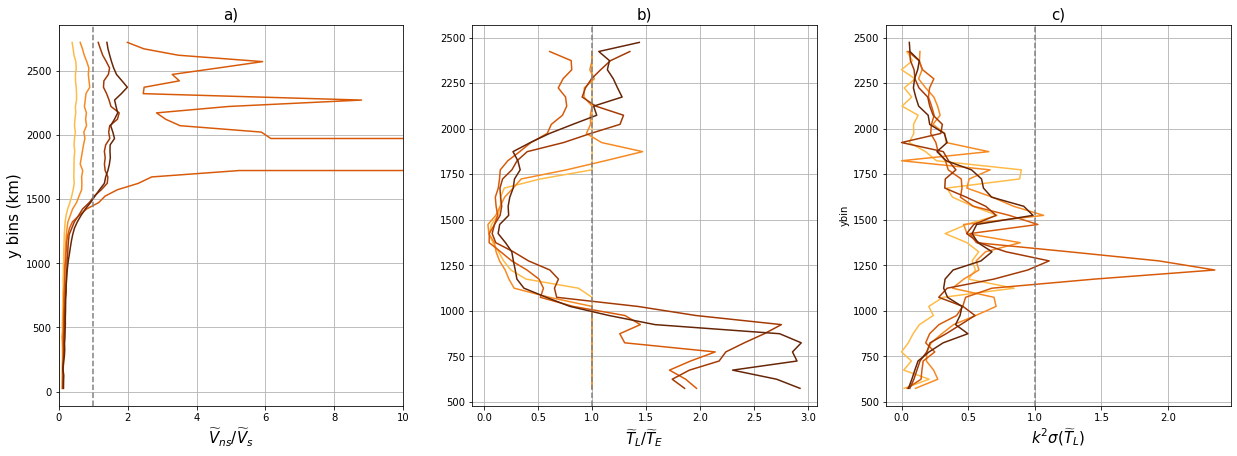

In [41]:
#Same figure but with ratio amplitude : 
size=15
for V in ['_u_avg','_v_avg']:
    fig,ax = plt.subplots(1,3,figsize=(21,7))
    for i,d in enumerate(dsv2):
        x1 = np.sqrt(d['E'+V].sel(param='Xt_ns')/d['E'+V].sel(param='Xt_s'))
        x2 = terms_E[i]
        x3 = terms_adv[i]
        x1.plot.line('-',ax=ax[0],y='ybin',c=colors[i])
        x2.plot.line('-',ax=ax[1],y='ybin',c=colors[i])
        x3.plot.line('-',ax=ax[2],y='ybin',c=colors[i])
    ax[0].grid();ax[1].grid();ax[2].grid()
    ax[0].axvline(1,c='grey',linestyle='--');ax[1].axvline(1,c='grey',linestyle='--');
    ax[2].axvline(1,c='grey',linestyle='--')
    ax[0].set_xlabel(r'$\widetilde{V}_{ns}/\widetilde{V}_s$',fontsize=size);
    ax[1].set_xlabel(r'$\widetilde{T}_L/\widetilde{T}_E$',fontsize=size);
    ax[2].set_xlabel(r'$k^2\sigma(\widetilde{T}_L)$',fontsize=size)
    #ax[2].set_xlabel(r'$k^2\overline{V}^2\overline{T}_L^2(\widetilde{T}_L/\overline{T}_L-\phi_{\mu}(\widetilde{T}_L/\overline{T}_L))$',fontsize=size);
    ax[0].set_ylabel('y bins (km)',fontsize=size);ax[1].set_ylabel('')
    ax[0].set_title('a)',fontsize=size);ax[1].set_title('b)',fontsize=size)
    ax[2].set_title('c)',fontsize=size);ax[0].set_xlim(0,10)
#fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure8_VnsVs.pdf',bbox_inches='tight')

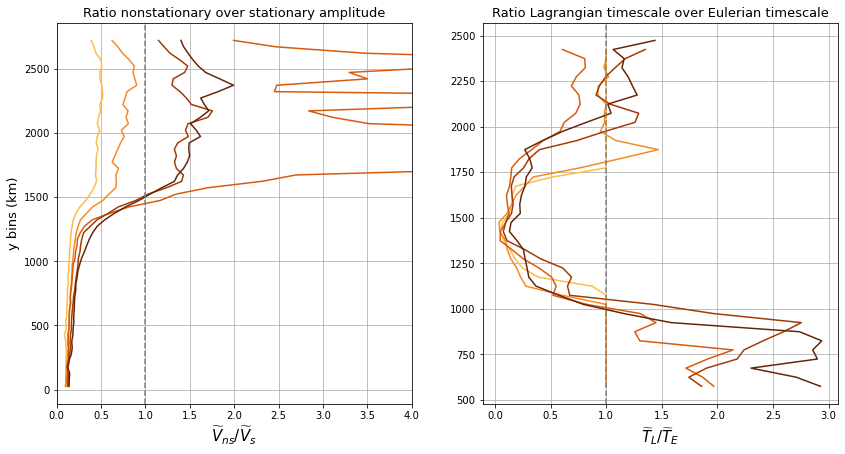

In [50]:
fig,ax = plt.subplots(1,2,figsize=(14,7))
for i,d in enumerate(dsv2):
    x1_E = np.sqrt(d['E'+V].sel(param='Xt_ns')/d['E'+V].sel(param='Xt_s'))
    x1_L = np.sqrt(d['L'+V].sel(param='Xt_ns')/d['L'+V].sel(param='Xt_s'))
    x2 = terms_E[i]
    x3 = terms_adv[i]
    x1_E.plot.line('-',ax=ax[0],y='ybin',c=colors[i])
    #x1_L.plot.line('-',ax=ax[0],y='ybin',marker='.',c=colors[i])
    x2.plot.line('-',ax=ax[1],y='ybin',c=colors[i])
ax[0].grid();ax[1].grid()
ax[0].axvline(1,c='grey',linestyle='--');ax[1].axvline(1,c='grey',linestyle='--');
ax[0].set_xlabel(r'$\widetilde{V}_{ns}/\widetilde{V}_s$',fontsize=size);
ax[1].set_xlabel(r'$\widetilde{T}_L/\widetilde{T}_E$',fontsize=size);
    #ax[2].set_xlabel(r'$k^2\overline{V}^2\overline{T}_L^2(\widetilde{T}_L/\overline{T}_L-\phi_{\mu}(\widetilde{T}_L/\overline{T}_L))$',fontsize=size);
ax[0].set_ylabel('y bins (km)',fontsize=size-2);ax[1].set_ylabel('')
ax[0].set_title('Ratio nonstationary over stationary amplitude',fontsize=size-2);
ax[1].set_title('Ratio Lagrangian timescale over Eulerian timescale',fontsize=size-2)
#ax[2].set_title('c)',fontsize=size);
ax[0].set_xlim(0,4)
fig.savefig('/Users/zcaspar/Documents/Figures/Figure8_ratio.pdf',bbox_inches='tight')

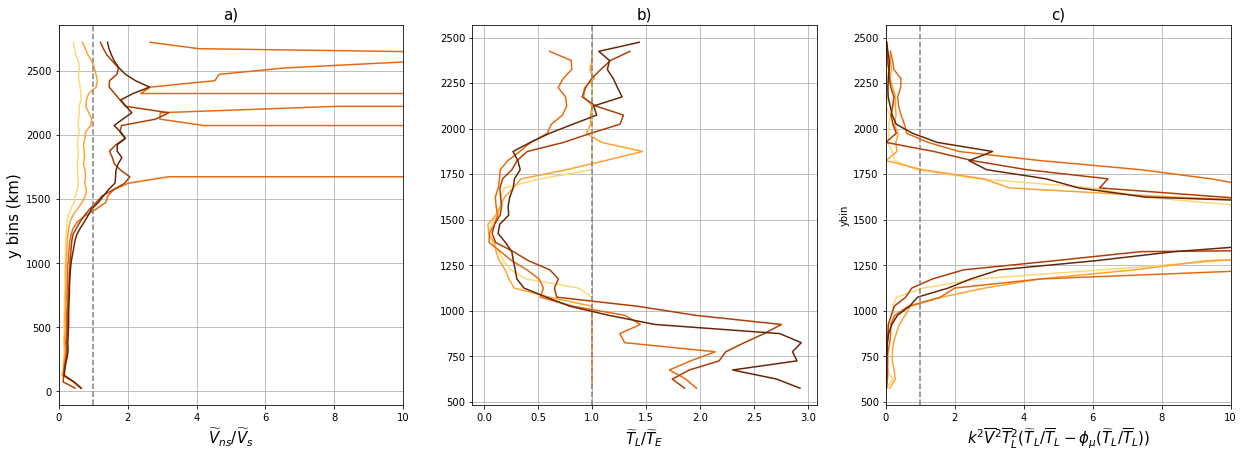

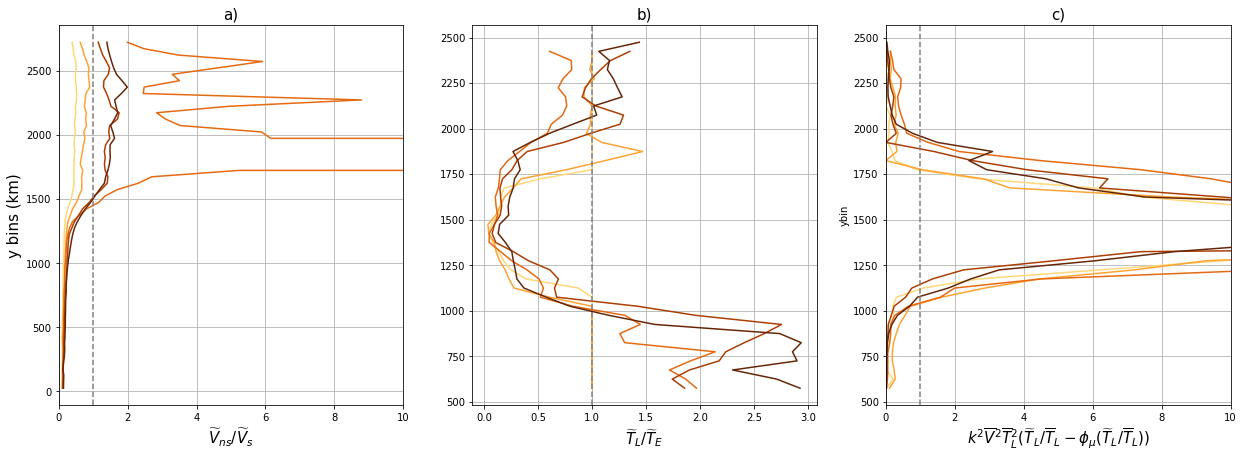

In [29]:
size=15
for V in ['_u_avg','_v_avg']:
    fig,ax = plt.subplots(1,3,figsize=(21,7))
    for i,d in enumerate(dsv2):
        x1 = np.sqrt(d['E'+V].sel(param='Xt_ns')/d['E'+V].sel(param='Xt_s'))
        x2 = terms_E[i]
        x3 = terms_adv_E[i]
        x1.plot.line('-',ax=ax[0],y='ybin',c=colors[i])
        x2.plot.line('-',ax=ax[1],y='ybin',c=colors[i])
        x3.plot.line('-',ax=ax[2],y='ybin',c=colors[i])
    ax[0].grid();ax[1].grid();ax[2].grid()
    ax[0].axvline(1,c='grey',linestyle='--');ax[1].axvline(1,c='grey',linestyle='--');
    ax[2].axvline(1,c='grey',linestyle='--')
    ax[0].set_xlabel(r'$\widetilde{V}_{ns}/\widetilde{V}_s$',fontsize=size);
    ax[1].set_xlabel(r'$\widetilde{T}_L/\widetilde{T}_E$',fontsize=size);
    ax[2].set_xlabel(r'$k^2\overline{V}^2\overline{T}_L^2(\widetilde{T}_L/\overline{T}_L-\phi_{\mu}(\widetilde{T}_L/\overline{T}_L))$',fontsize=size);
    ax[0].set_ylabel('y bins (km)',fontsize=size);ax[1].set_ylabel('')
    ax[0].set_title('a)',fontsize=size);ax[1].set_title('b)',fontsize=size)
    ax[2].set_title('c)',fontsize=size);ax[0].set_xlim(0,10);ax[2].set_xlim(0,10)

### Additional figures :

#### Figures on slow motion autocovariance estimation : 

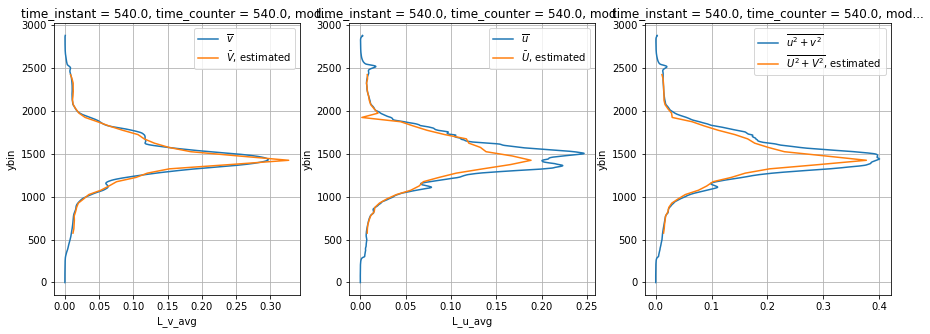

In [35]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(dsv2[-2].V.isel(s_rho=-1),dsv2[-2].V.y_rho.values*1e-3, label=r'$\overline{v}$')
np.sqrt(dsv2[-2]['L_v_avg'].sel(param='Xb')).plot(y='ybin',label=r'$\bar V$, estimated',ax=ax[0])
ax[1].plot(dsv2[-2].U.isel(s_rho=-1),dsv2[-2].V.y_rho.values*1e-3, label=r'$\overline{u}$')
np.sqrt(dsv2[-2]['L_u_avg'].sel(param='Xb')).plot(y='ybin',label=r'$\bar U$, estimated',ax=ax[1])
ax[2].plot(dsv2[-2].Uprime,dsv2[-2].V.y_rho.values*1e-3, label=r'$\overline{u^2+v^2}$')
np.sqrt(dsv2[-2]['L_u_avg'].sel(param='Xb')+dsv2[-2]['L_v_avg'].sel(param='Xb')).plot(y='ybin',label=r'$\overline{U^2+V^2}$, estimated',ax=ax[2])

for a in ax:
    a.legend();a.grid()



In [35]:
terms_E_2D = [r_E(Tau,Te_v2[i]['E_v_avg']) for i in range(len(dsv2))]
#terms2_2D = [t2(Tau,Tbl_v2[i]['L'+V],Ltilde_mean[i],np.sqrt(2*Xbl_v2[i]['L_v_avg'])) for i in range(len(dsv2))]
terms_2D_adv = [T2(Tau,Tbl_v2[i]['L'+V],Ltilde_mean[i],np.sqrt(2*Xbl_v2[i]['L_v_avg'])) for i in range(len(dsv2))]
#terms3_2D = [t3(Tau,Tbl_v2[i]['L'+V],Ltilde_mean[i],np.sqrt(2*Xbl_v2[i]['L_v_avg'])) for i in range(len(dsv2))]

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/plot/plot.py:959: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  primitive = ax.pcolormesh(x, y, z, **kwargs)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/plot/plot.py:959: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  primitive = ax.pcolormesh(x, y, z, **kwargs)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/plot/plot.py:959: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  primitive 

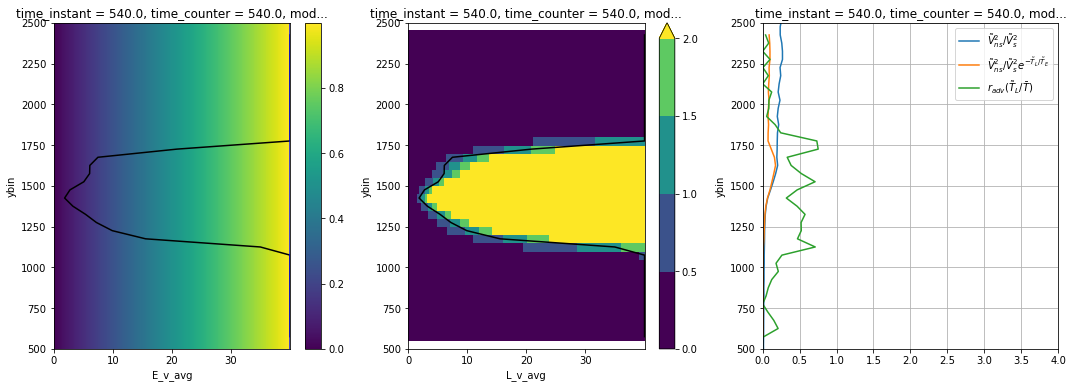

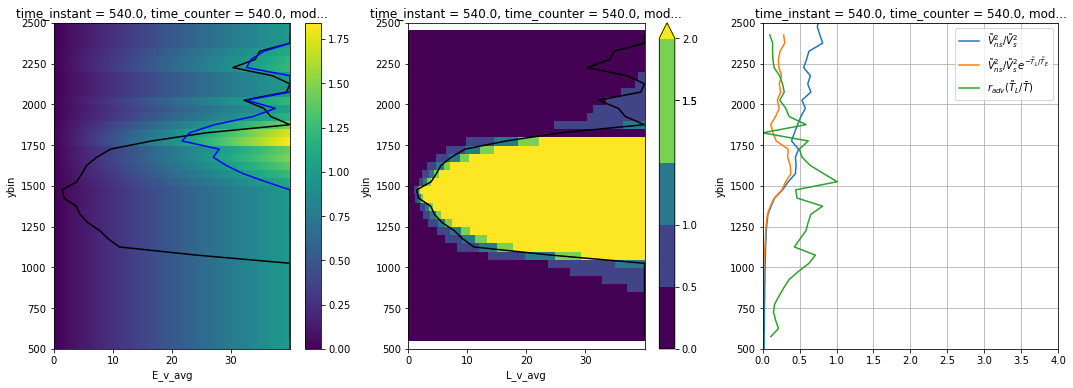

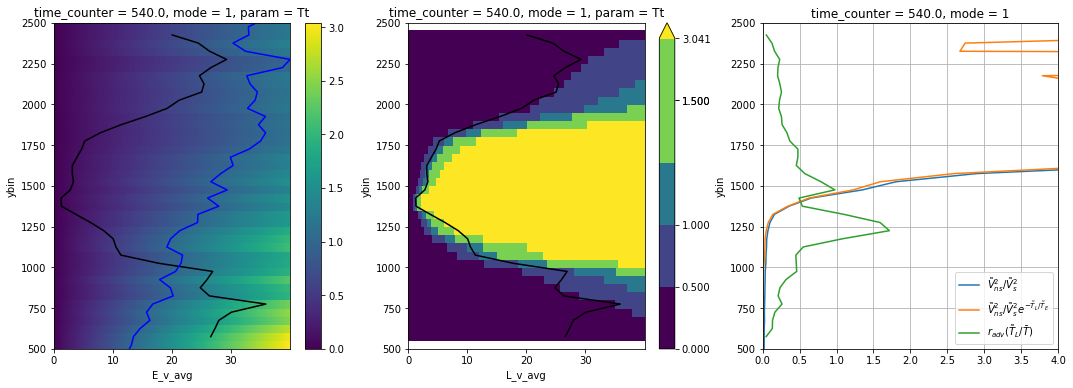

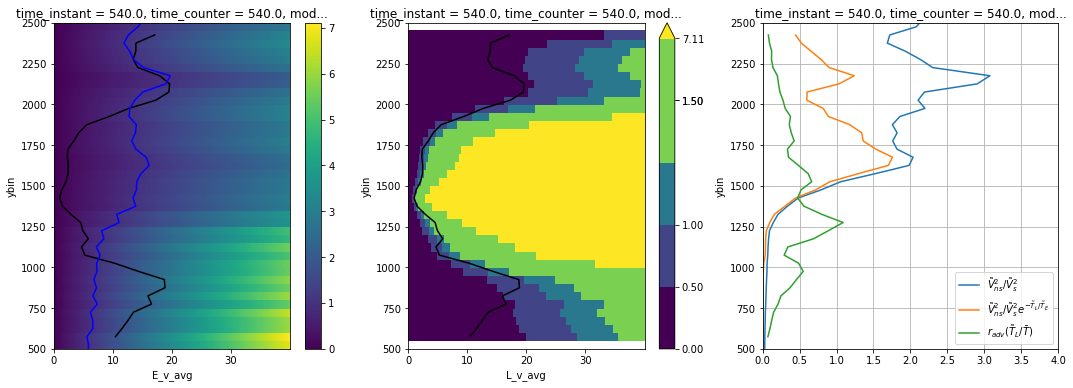

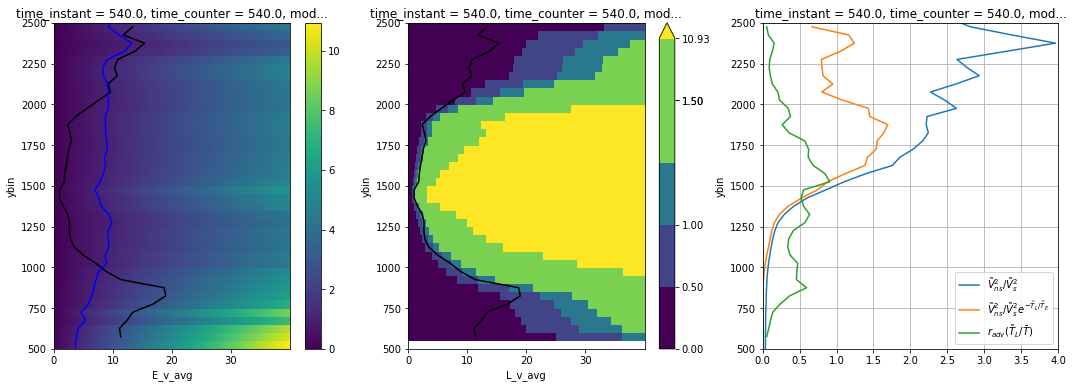

In [43]:
for i in range(len(dsv2)):
    fig,ax=plt.subplots(1,3,figsize=(18,6))
    terms_E_2D[i].sel(ybin=slice(500,2500)).plot(y='ybin',ax=ax[0])
    Tl_v2[i]['L_v_avg'].plot(y='ybin',c='k',ax=ax[0])
    Te_v2[i]['E_v_avg'].plot(y='ybin',c='b',ax=ax[0])
    re_max = terms_E_2D[i].sel(ybin=slice(500,2500)).max().values
    if i ==0:
        levs = [0,0.5,re_max,1.5,2] 
    else : 
        levs = [0,0.5,1,1.5,np.min([1.5,re_max,2]),np.max([re_max,2])]
    (terms_2D_adv[i].sel(ybin=slice(500,2500))).plot(y='ybin',ax=ax[1],levels=levs)
    Tl_v2[i]['L_v_avg'].plot(y='ybin',c='k',ax=ax[1])
    (dsv2[i]['E_v_avg'].sel(param='Xt_ns')/dsv2[i]['E_v_avg'].sel(param='Xt_s')).plot(ax=ax[2],y='ybin',label=r'$\tilde V_{ns}^2/\tilde V_s^2$')
    (dsv2[i]['E_v_avg'].sel(param='Xt_ns')/dsv2[i]['E_v_avg'].sel(param='Xt_s')*np.exp(-Tl_v2[i]['L_v_avg']/Te_v2[i]['E_v_avg'])).plot(ax=ax[2],y='ybin',label=r'$\tilde V_{ns}^2/\tilde V_s^2 e^{-\tilde T_L/\tilde T_E}$')
    (terms_adv[i]).plot(ax=ax[2],y='ybin',label=r'$r_{adv}(\tilde T_L/\bar T)$')
    ax[2].grid();ax[2].set_ylim(500,2500);ax[2].set_xlim(0,4);ax[2].legend()

In [46]:
#### Regimes : 

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

Text(0, 0.5, '$k\\bar V \\tilde T_E$')

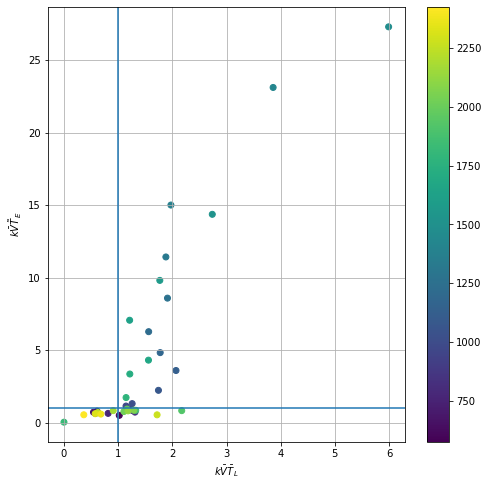

In [49]:
i=1
plt.figure(figsize=(8,8))
k = 2*np.pi/Ltilde_mean[i]
Vbar = np.sqrt(Xbl_v2[i]['L_v_avg'])*3600*24
Tbar = Tbl_v2[i]['L_v_avg']
Tt = Te_v2[i]['E_v_avg']
plt.scatter(k*Vbar*Tbar,k*Vbar*Tt,c=k.ybin.values)
plt.grid();plt.axvline(1);plt.axhline(1);
plt.colorbar();plt.xlabel(r'$k\bar V \bar T_L$');plt.ylabel(r'$k\bar V \tilde T_E$')